In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import pylab
import scipy.stats as stats

import seaborn as sns
from numpy import linalg as la
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train (1).csv',header=None)
df=data[:20]
X=np.array(df[0]).reshape(-1,1)
y=np.array(df[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

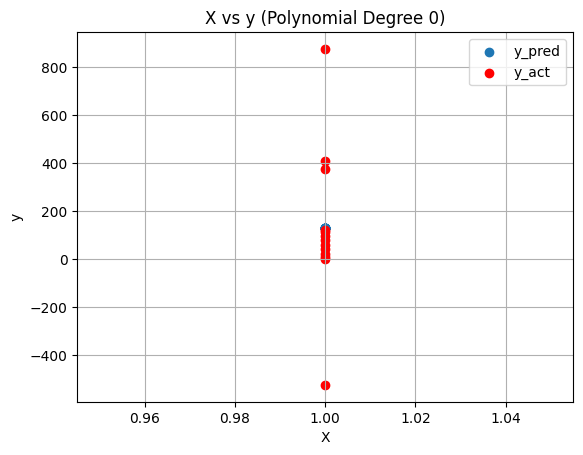

RMSE (train)(degree2) 199.99292761338248
RMSE (test)(degree2) 261.3920138445233


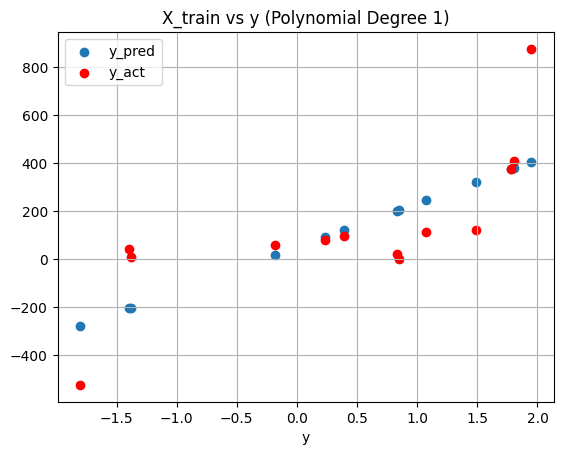

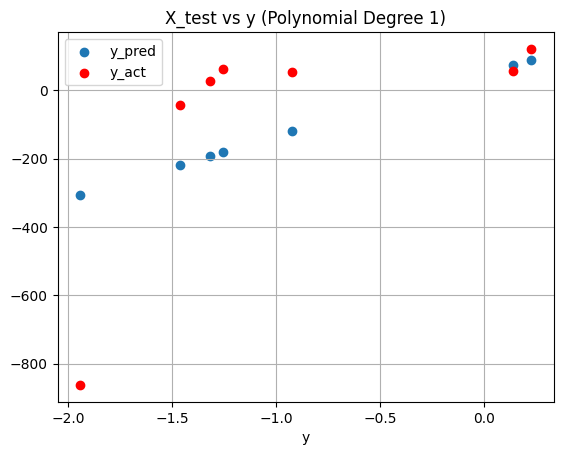

RMSE (train)(degree3) 188.7132731361501
RMSE (test)(degree3) 303.28616230639585


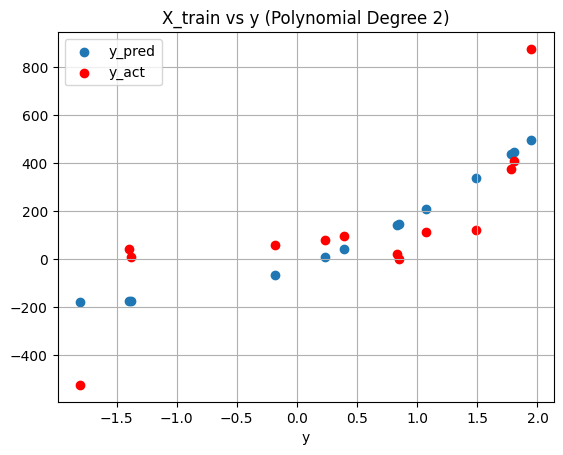

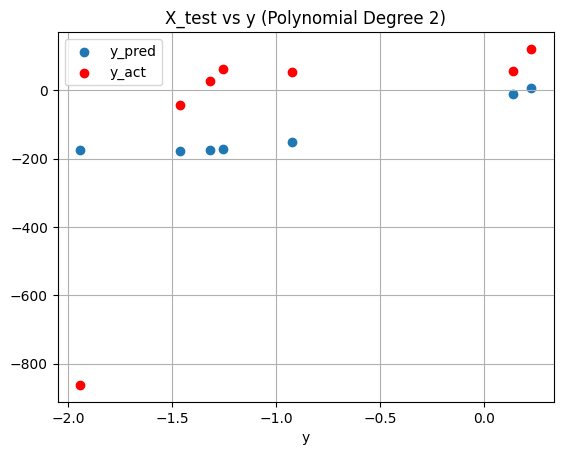

RMSE (train)(degree4) 84.7685696800325
RMSE (test)(degree4) 87.95552468195771


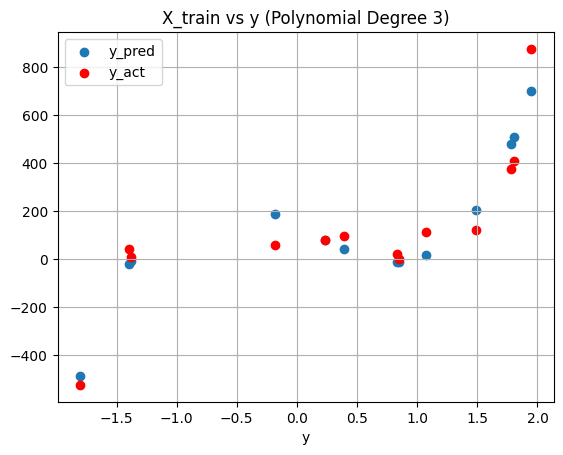

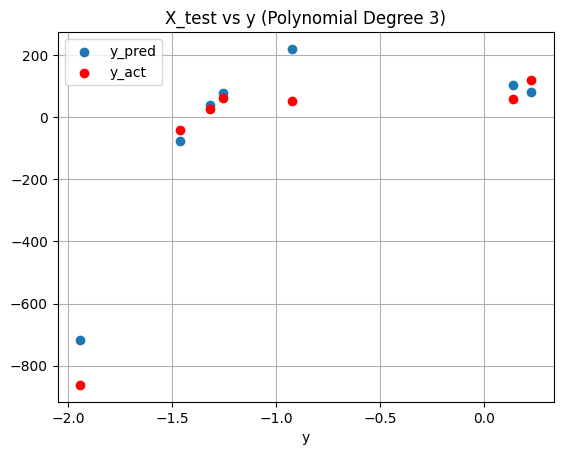

RMSE (train)(degree5) 84.69462621642758
RMSE (test)(degree5) 90.14977918583133


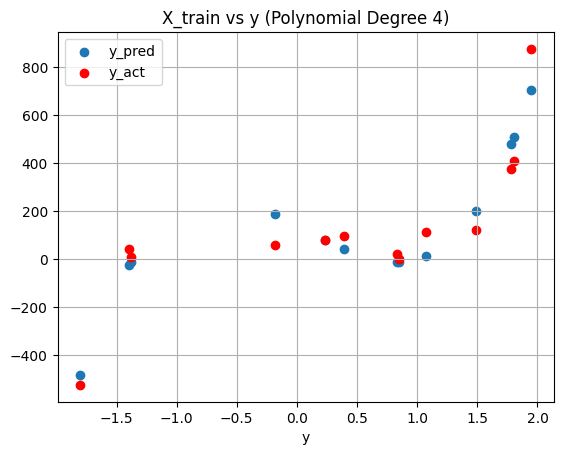

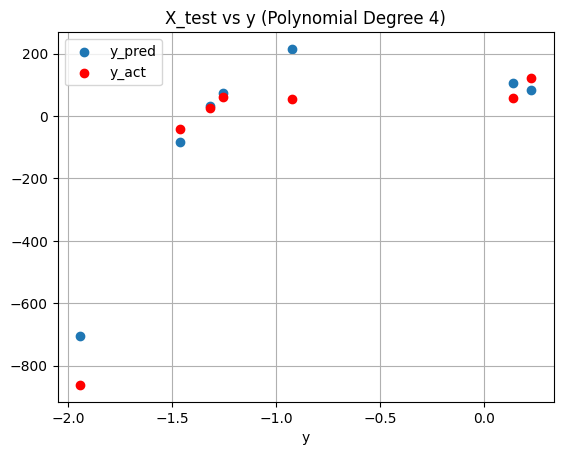

RMSE (train)(degree6) 41.003572795788564
RMSE (test)(degree6) 38.96805467389617


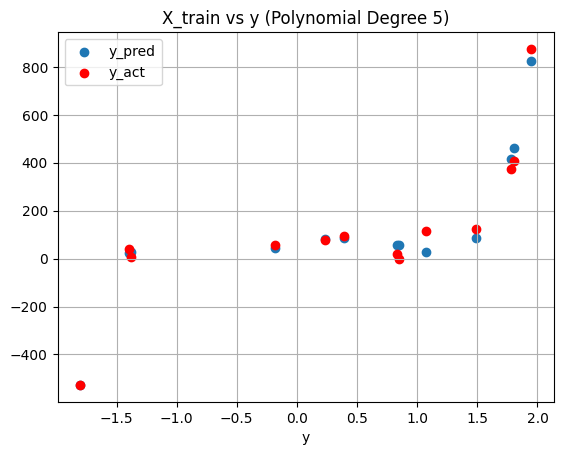

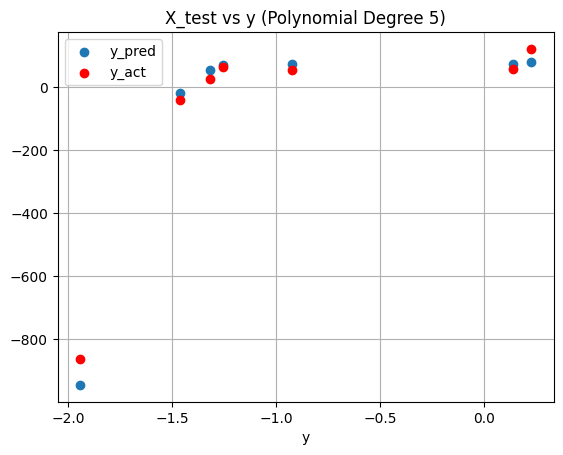

RMSE (train)(degree7) 36.595192109819145
RMSE (test)(degree7) 72.08662620954571


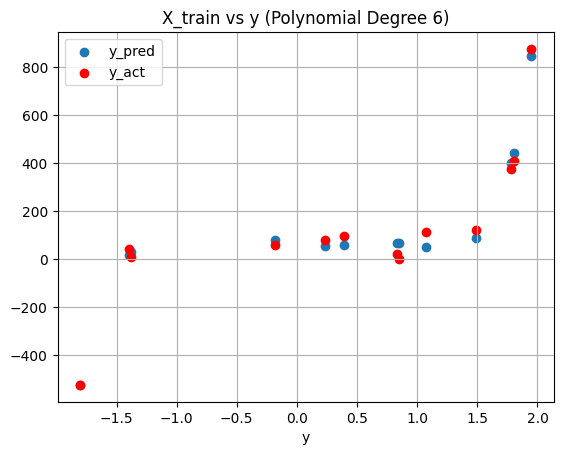

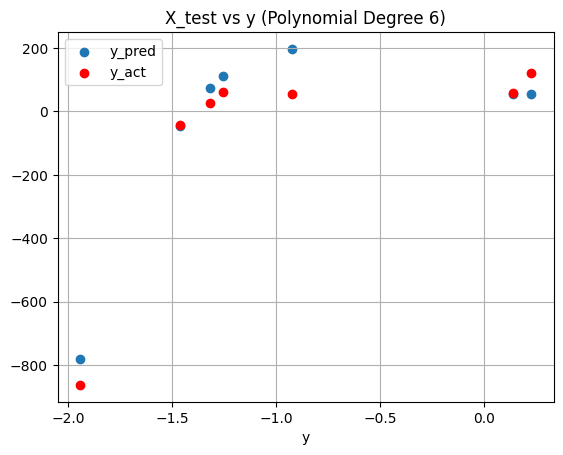

RMSE (train)(degree8) 19.672251216460502
RMSE (test)(degree8) 500.8043007880425


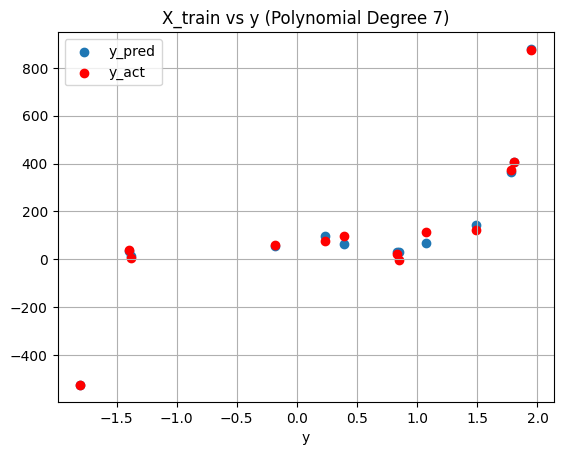

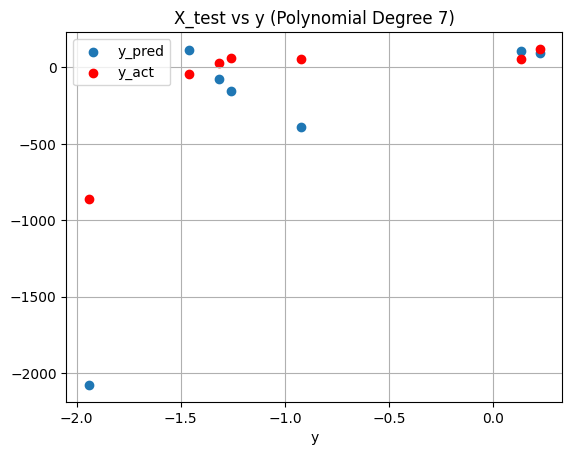

RMSE (train)(degree9) 19.035003733569372
RMSE (test)(degree9) 886.1976317693427


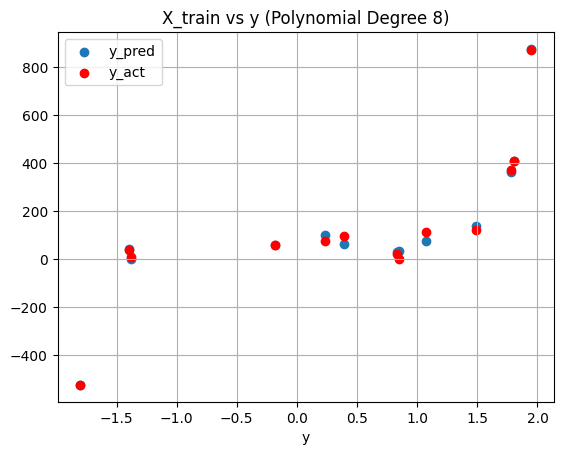

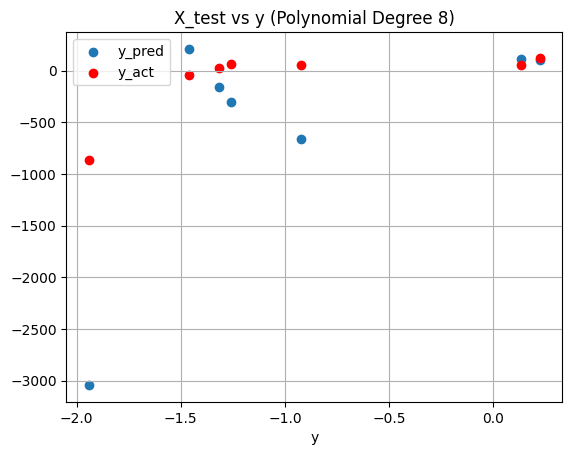

RMSE (train)(degree10) 17.785510683661204
RMSE (test)(degree10) 344.71500766935236


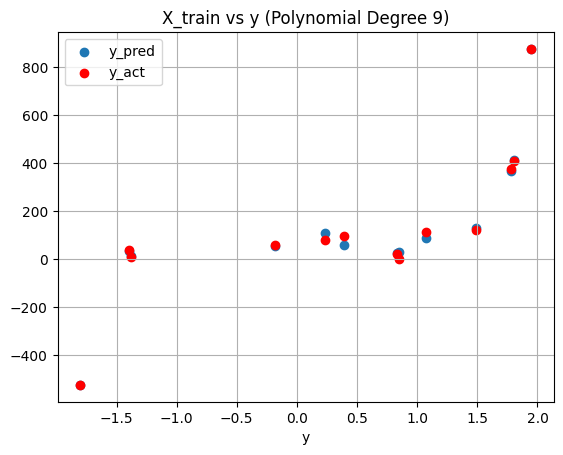

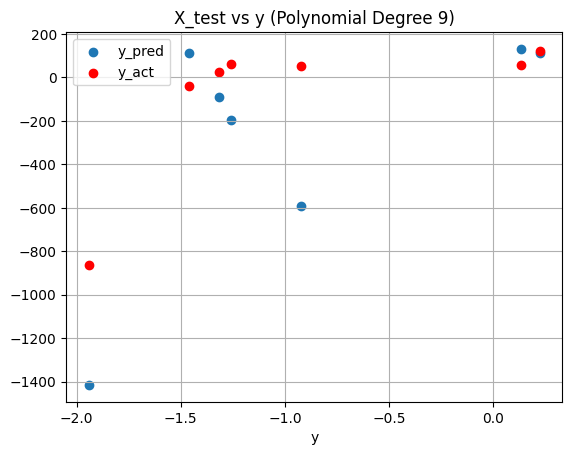

RMSE (train)(degree11) 7.774260000777065
RMSE (test)(degree11) 5129.665219067026


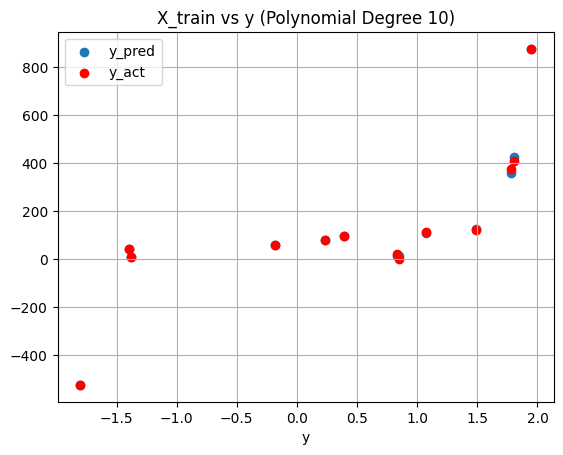

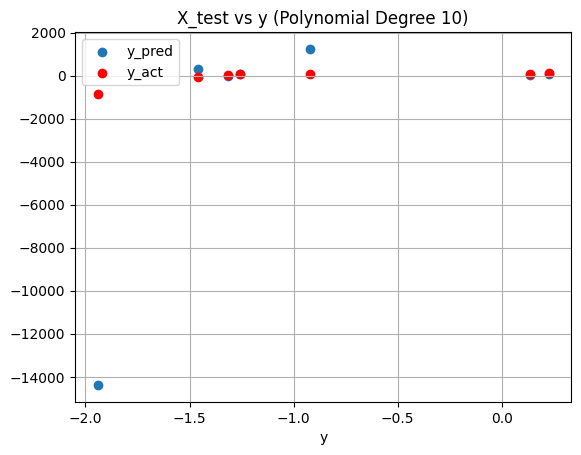

In [6]:
# analytic
n=len(y_train)
m=len(y_test)
X_list_train=[np.ones((n,1))]
X_list_test=[np.ones((m,1))]
w_ml_list=[]
X_l_train=np.ones((n,1))
X_l_test=np.ones((m,1))
w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
w_ml_list.append(w_ml)
y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
plt.scatter(X_l_train,y_pred,label='y_pred')
plt.scatter(X_l_train,y_train,label="y_act",c='r')
plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y (Polynomial Degree 0)")
plt.legend()
plt.grid(visible=True)
plt.show()

max_degree=12
rmse_train=[]
rmse_test=[]
for i in range(2,max_degree):
    X_l_train=np.ones((n,1))
    X_l_test=np.ones((m,1))
    for j in range(1,i):
        X_l_train=np.append(X_l_train,np.vstack(X_train**j),axis=1)
        X_l_test=np.append(X_l_test,np.vstack(X_test**j),axis=1)
    X_list_train.append(X_l_train)
    X_list_test.append(X_l_test)
    w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
    w_ml_list.append(w_ml)
    y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
    y_test_pred=np.dot(X_l_test,w_ml.reshape(-1,1))
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))
    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')

    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i-1})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

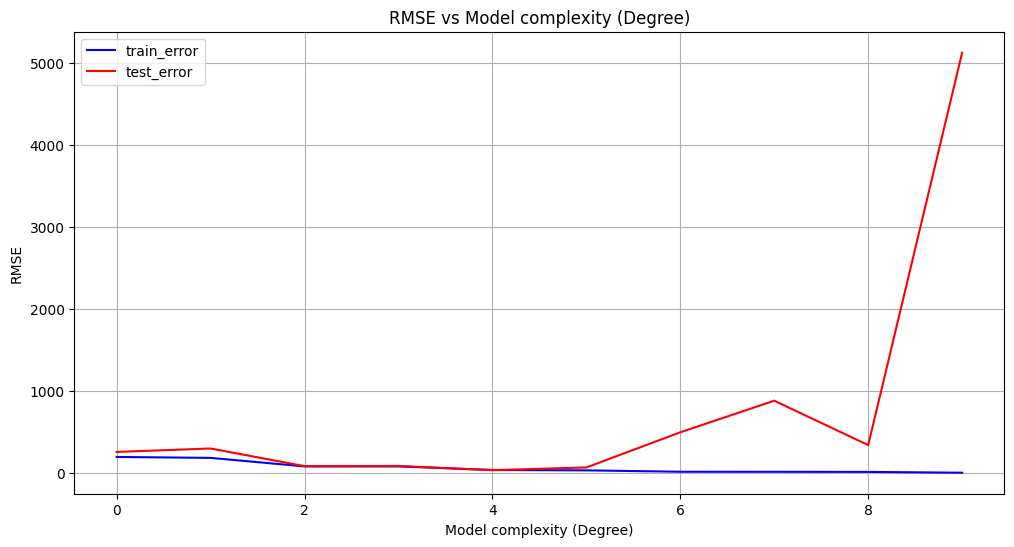

In [7]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree-2),rmse_train,c='b',label='train_error')
plt.plot(range(max_degree-2),rmse_test,c='r',label='test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for validation:  38.96805467389617


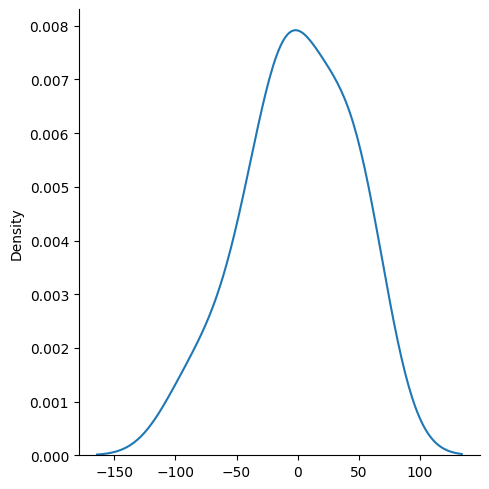

In [8]:
n=len(y_train)
m=len(y_test)
X_l_train=np.ones((n,1))
X_l_test=np.ones((m,1))
Degree=6
for j in range(1,Degree):
    X_l_train=np.append(X_l_train,np.vstack(X_train**j),axis=1)
    X_l_test=np.append(X_l_test,np.vstack(X_test**j),axis=1)
X_list_train.append(X_l_train)
X_list_test.append(X_l_test)
w_ml=np.dot((la.inv(X_l_train.T @ X_l_train) @  X_l_train.T),y_train)
y_pred=np.dot(X_l_train,w_ml.reshape(-1,1))
y_test_pred=np.dot(X_l_test,w_ml.reshape(-1,1))
train_noise=(y_pred.reshape(-1)-y_train)
sns.displot(train_noise,kind='kde')
print('rmse for validation: ', np.sqrt(mse(y_test_pred,y_test)))

((array([-1.62649229, -1.1460438 , -0.83908498, -0.59616318, -0.38436112,
         -0.18866497,  0.        ,  0.18866497,  0.38436112,  0.59616318,
          0.83908498,  1.1460438 ,  1.62649229]),
  array([-87.39085013, -51.08910991, -35.95185328, -17.52594081,
         -12.84212588,  -8.73090785,  -1.70027248,   2.97668399,
          22.22296732,  37.19621988,  43.77506003,  51.6817989 ,
          57.37833024])),
 (45.02891109661681, -7.426889500350973e-13, 0.9823936262579118))

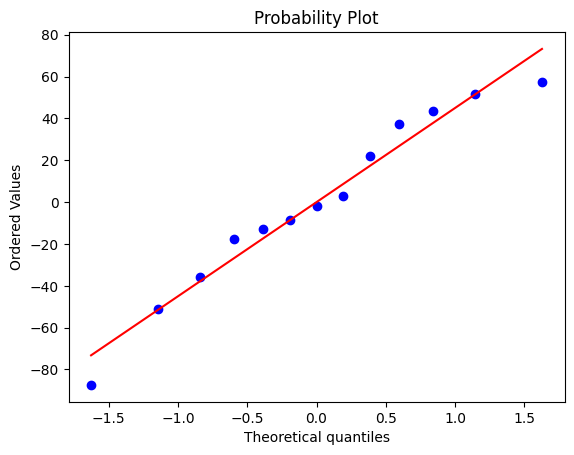

In [9]:
stats.probplot(train_noise,dist='norm',plot=plt)

((array([-1.31487275, -0.74397649, -0.3471943 ,  0.        ,  0.3471943 ,
          0.74397649,  1.31487275]),
  array([-83.40833189, -41.4196629 ,   7.43643396,  15.04600119,
          19.88145076,  22.83339925,  27.54465077])),
 (41.202246239804786, -4.583722694528391, 0.8822154687926442))

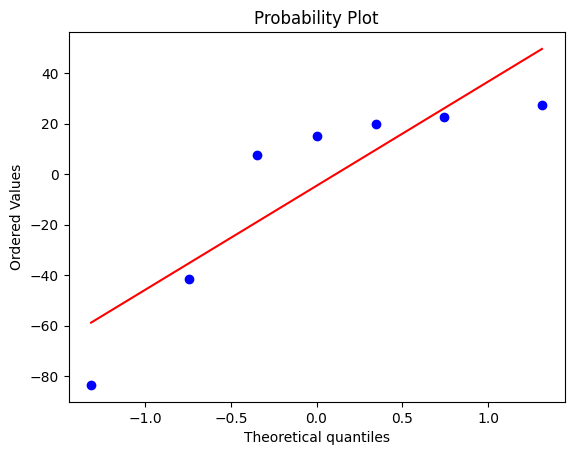

In [10]:
stats.probplot(y_test_pred.reshape(-1)-y_test,plot=plt)

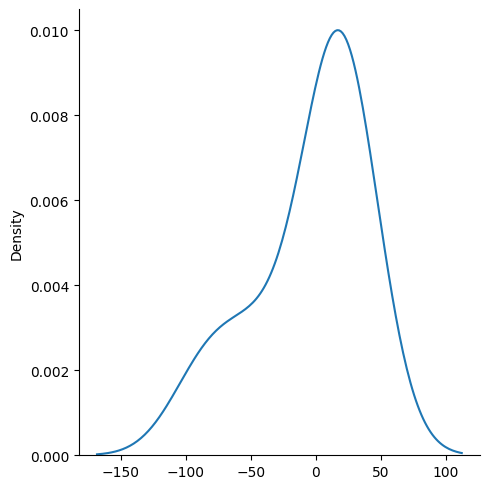

In [11]:
sns.displot(y_test_pred.reshape(-1)-y_test,kind='kde')

rmse for test: 52.98497380768416


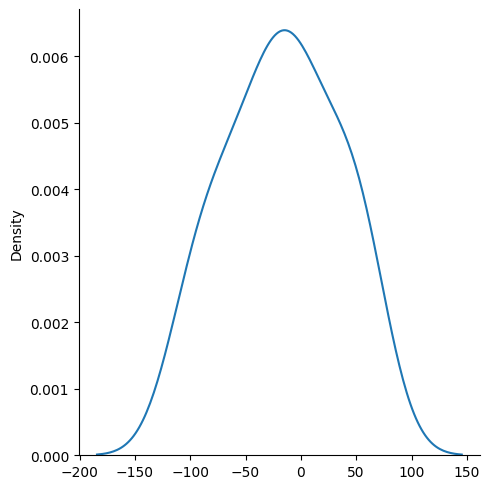

In [12]:
df_test = pd.read_csv('test (1).csv',header=None)
X_t=np.array(df_test[0]).reshape(-1,1)
y_t=np.array(df_test[1])
m=len(y_t)
X_l_test=np.ones((m,1))
for j in range(1,Degree):
    
    X_l_test=np.append(X_l_test,np.vstack(X_t**j),axis=1)


y_test_pred=np.dot(X_l_test,w_ml.reshape(-1,1))
test_noise=(y_test_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test:', np.sqrt(mse(y_test_pred,y_t)))

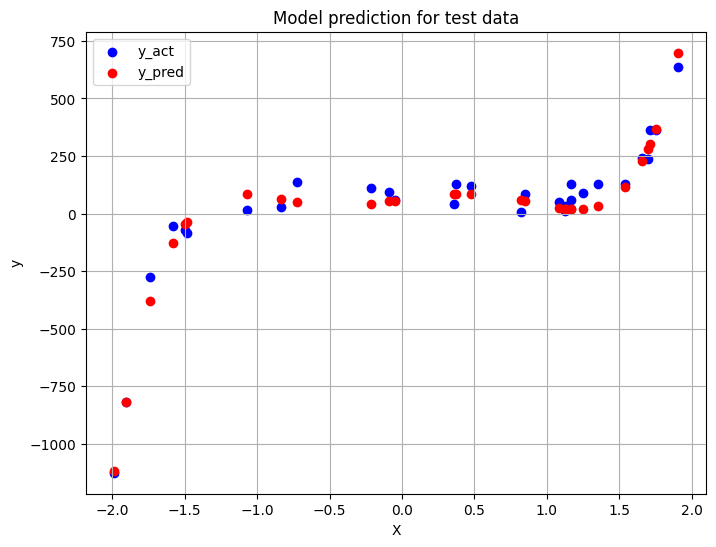

optimised weights: [  60.6223       91.73276832    8.1389341  -190.10296487  -11.36832717
   75.79433607]


In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label='y_act')
plt.scatter(X_t,y_test_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('optimised weights:', w_ml)

RMSE (train)(degree0) 301.65275552911066
RMSE (test)(degree0) 384.36621168239157


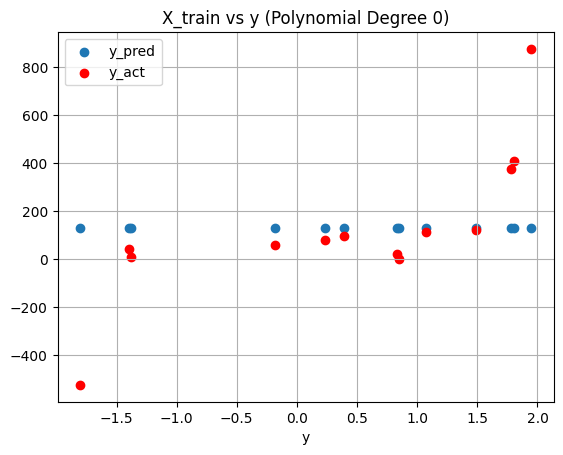

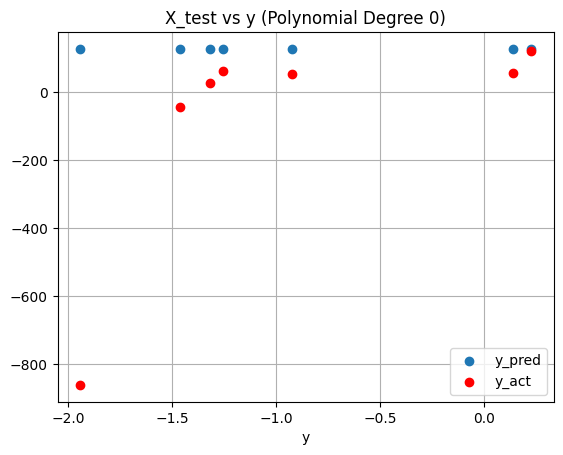

RMSE (train)(degree1) 199.99456399173914
RMSE (test)(degree1) 261.3785477076333


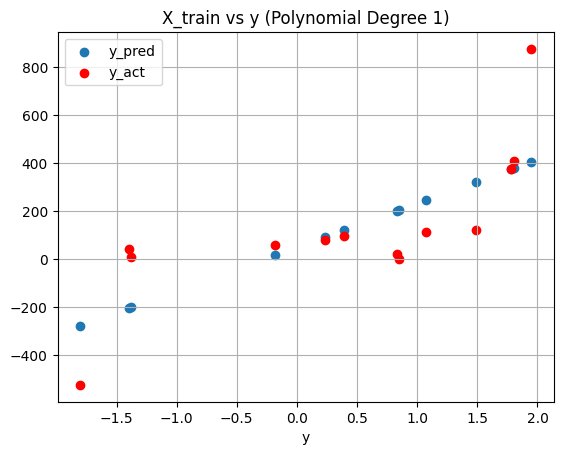

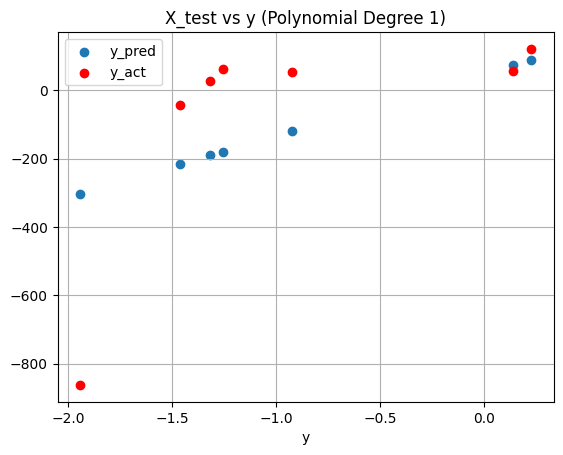

RMSE (train)(degree2) 188.71607529197246
RMSE (test)(degree2) 302.9292560581193


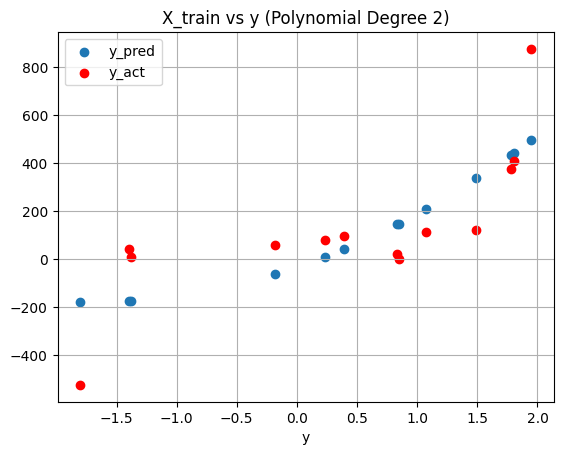

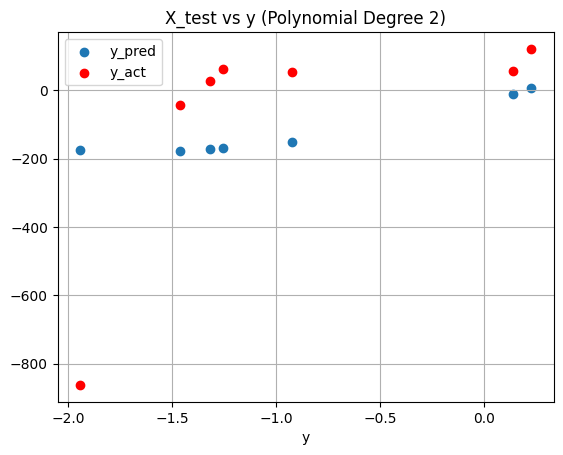

RMSE (train)(degree3) 84.88055595389226
RMSE (test)(degree3) 88.33685352701661


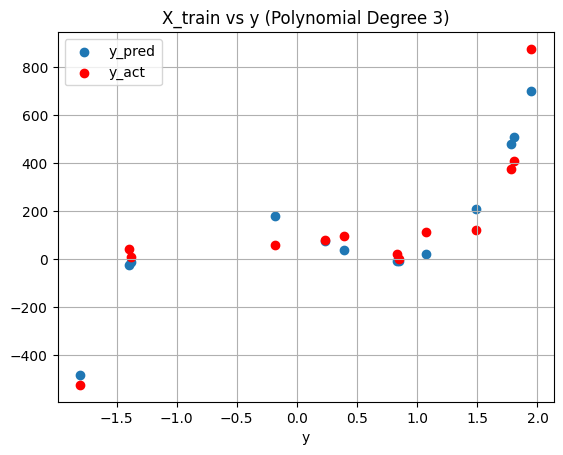

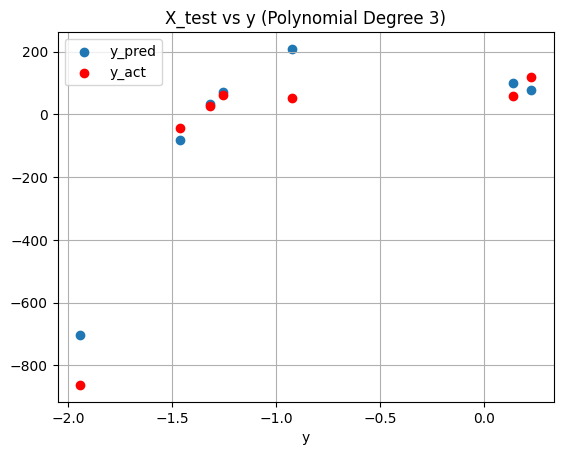

RMSE (train)(degree4) 84.84818547503134
RMSE (test)(degree4) 88.81994816985107


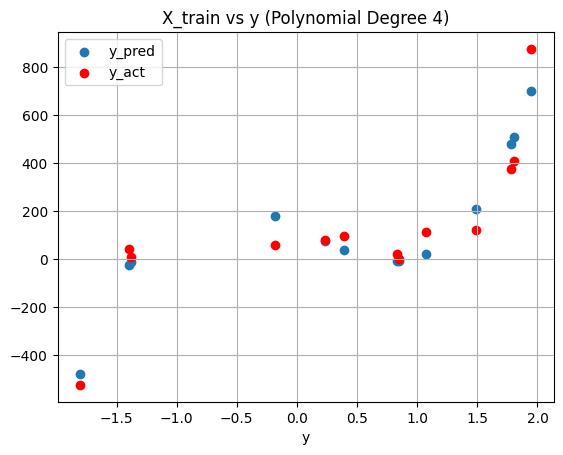

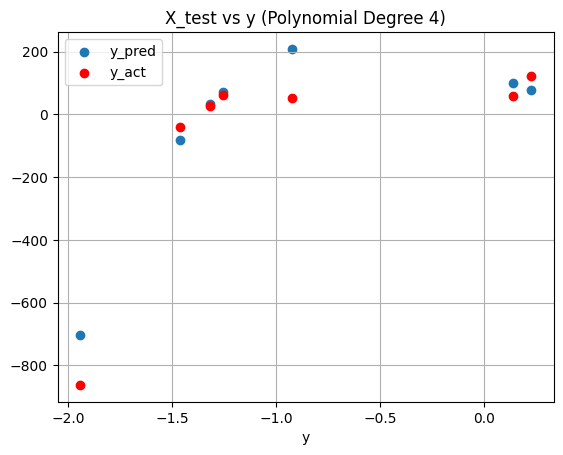

RMSE (train)(degree5) 42.625906405001714
RMSE (test)(degree5) 37.34439238596025


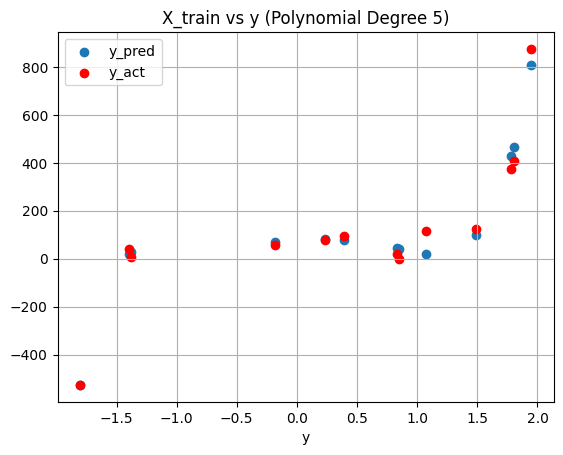

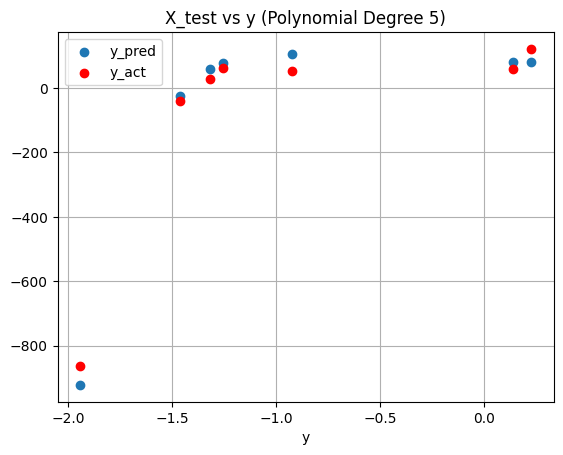

RMSE (train)(degree6) 39.74166787271432
RMSE (test)(degree6) 36.57488340421212


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


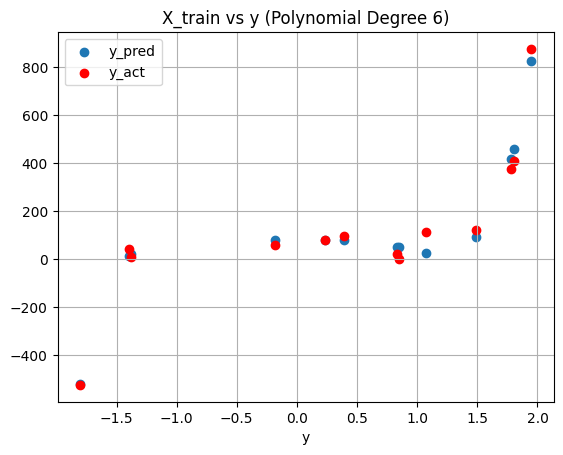

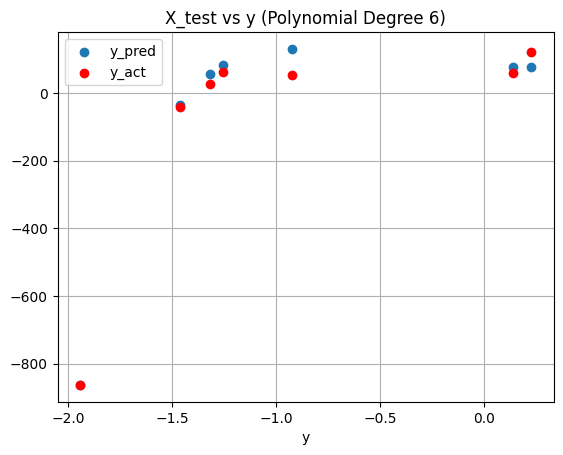

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.604e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree7) 33.340780980641185
RMSE (test)(degree7) 61.11743465454009


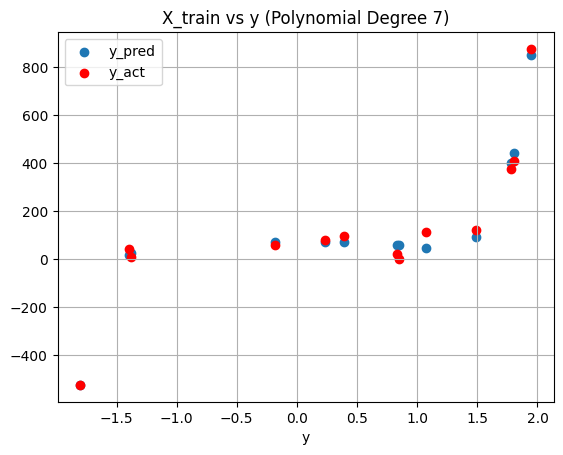

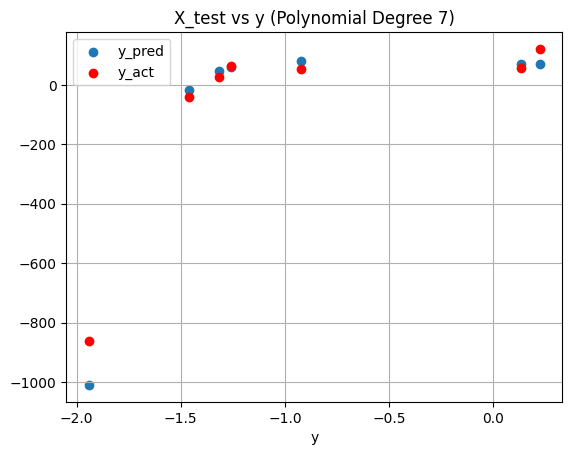

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.360e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree8) 32.40254365027311
RMSE (test)(degree8) 50.65130958576106


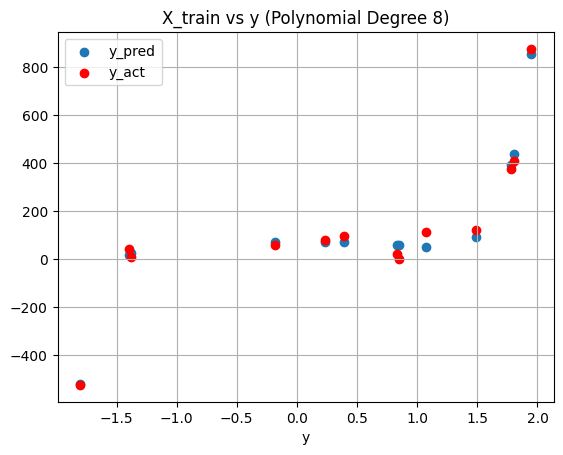

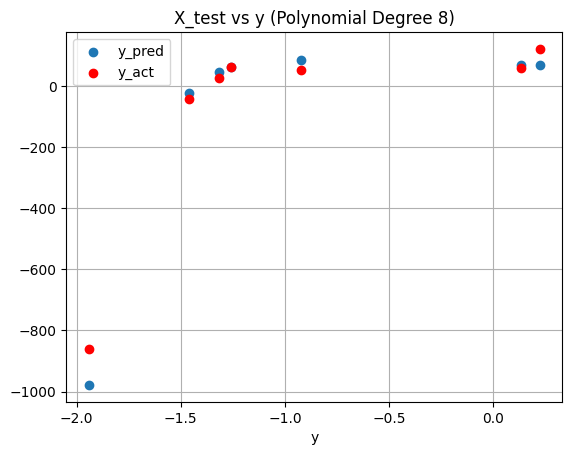

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.148e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree9) 29.687614780605077
RMSE (test)(degree9) 90.69975935703471


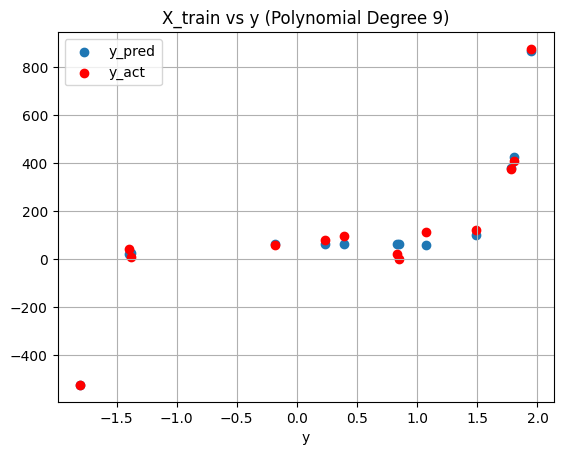

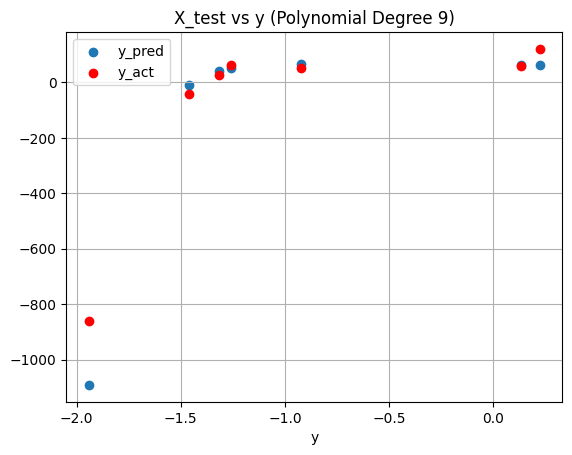

RMSE (train)(degree10) 29.31907673242582
RMSE (test)(degree10) 83.51361373928752


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.289e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


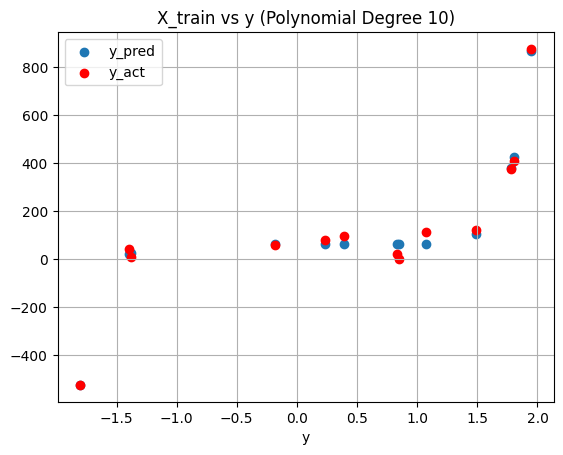

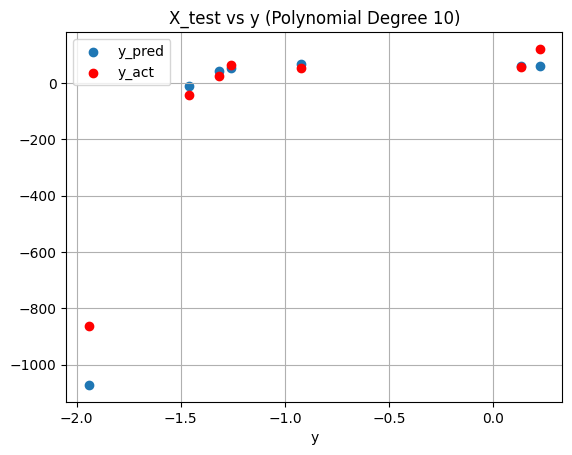

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.372e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree11) 28.33355186414508
RMSE (test)(degree11) 118.30528165524937


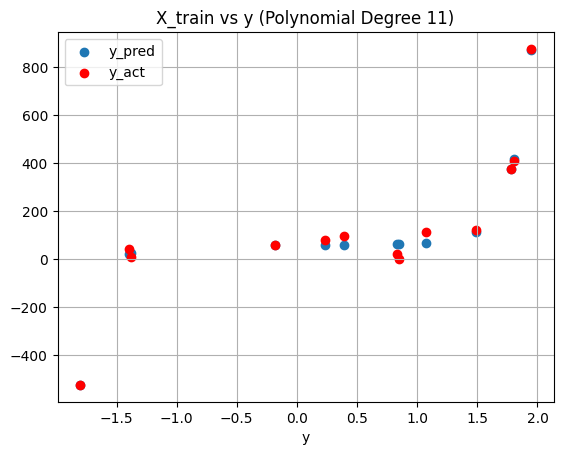

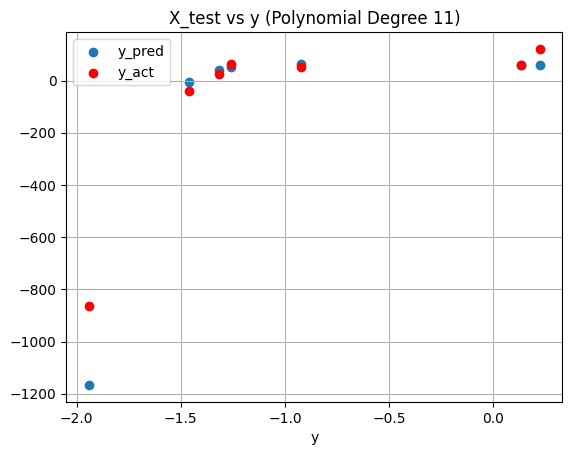

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.453e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree12) 28.182032542627343
RMSE (test)(degree12) 111.92996858697457


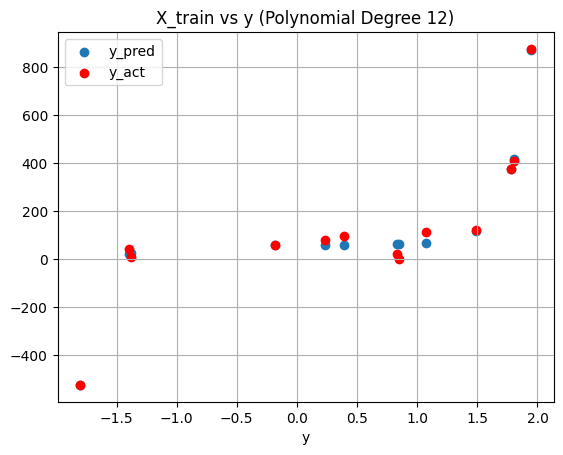

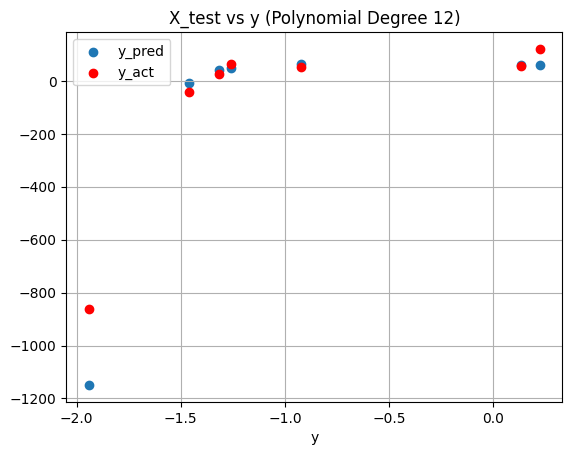

RMSE (train)(degree13) 27.829909772935252
RMSE (test)(degree13) 138.33672818016984


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.553e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


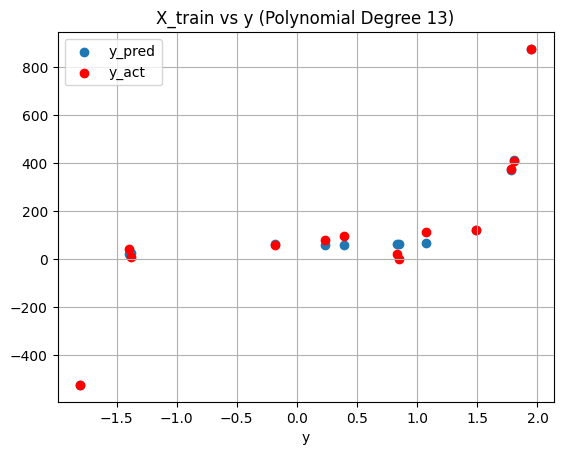

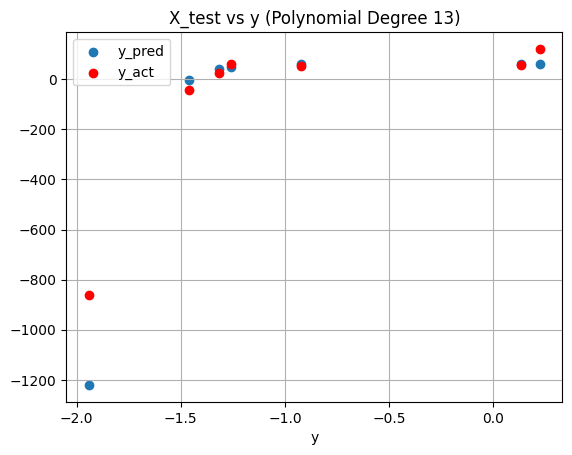

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.656e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree14) 27.76672032170148
RMSE (test)(degree14) 132.57970636919583


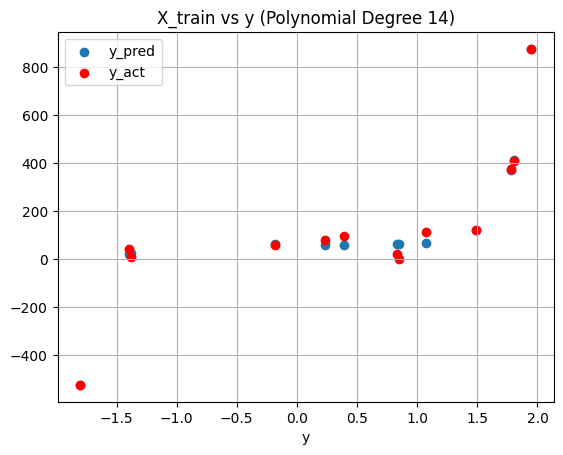

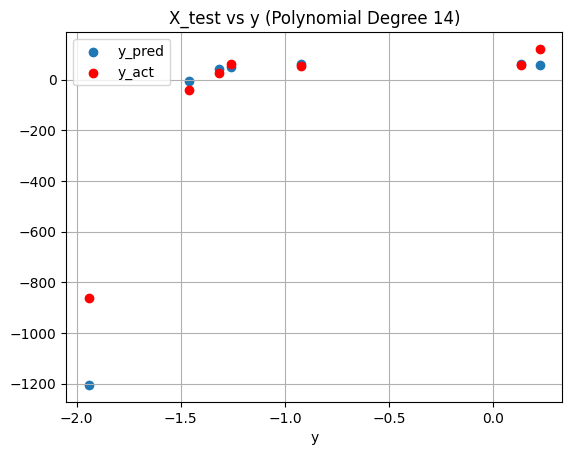

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.921e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree15) 27.58747544047657
RMSE (test)(degree15) 157.0344128898028


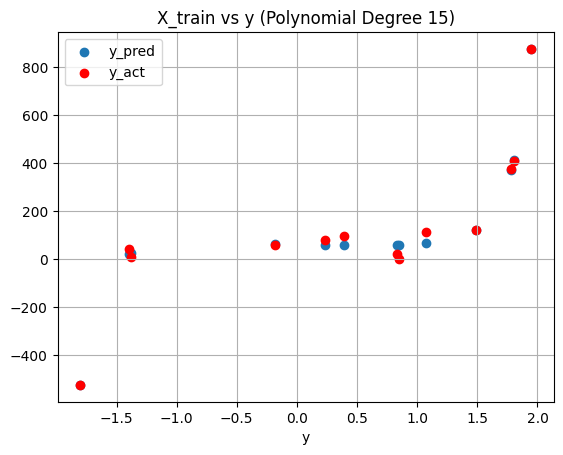

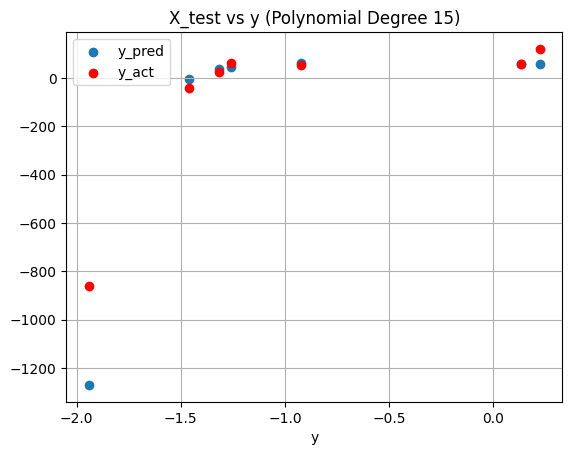

RMSE (train)(degree16) 27.586073949646988
RMSE (test)(degree16) 156.31628209580674


C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.853e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


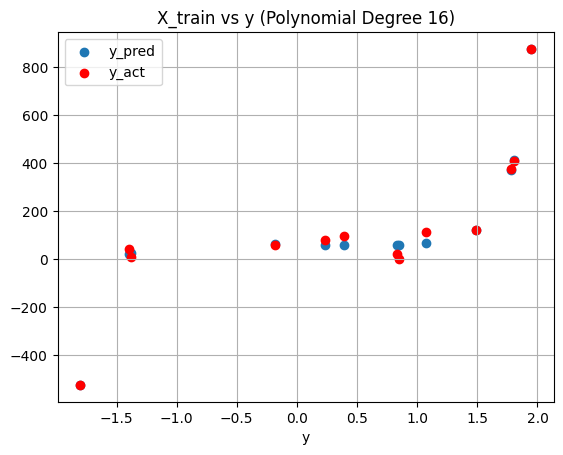

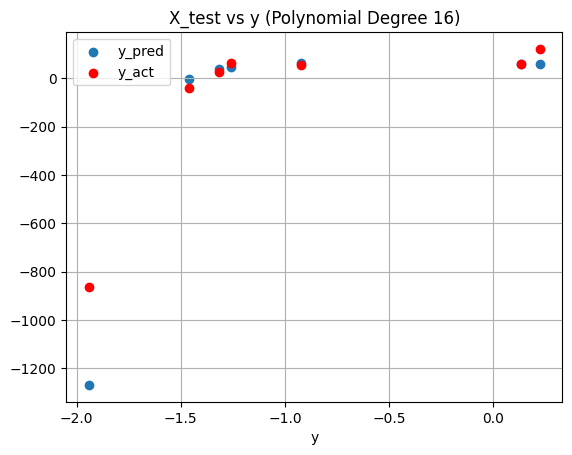

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.961e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree17) 27.518903898296745
RMSE (test)(degree17) 176.60721295435243


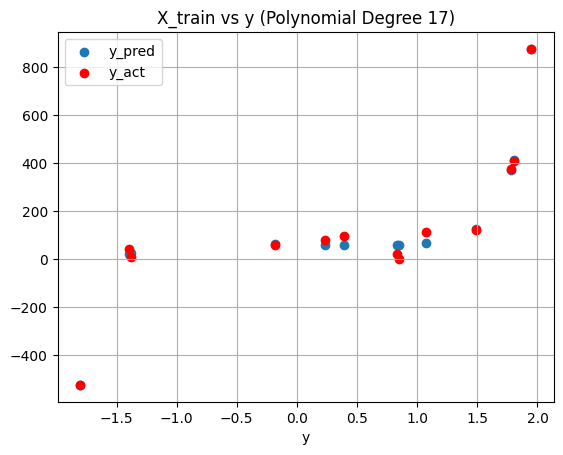

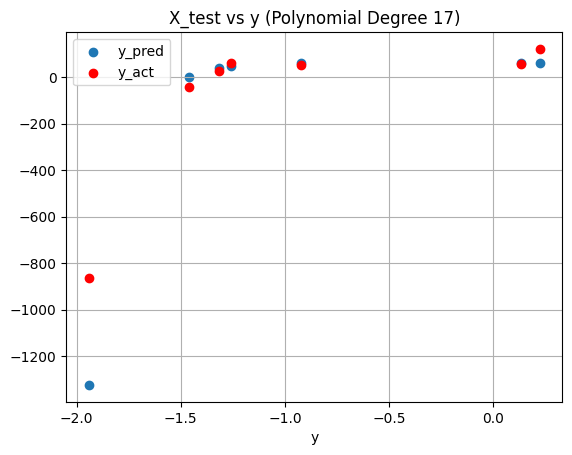

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.935e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree18) 27.536451277134248
RMSE (test)(degree18) 177.2893527326146


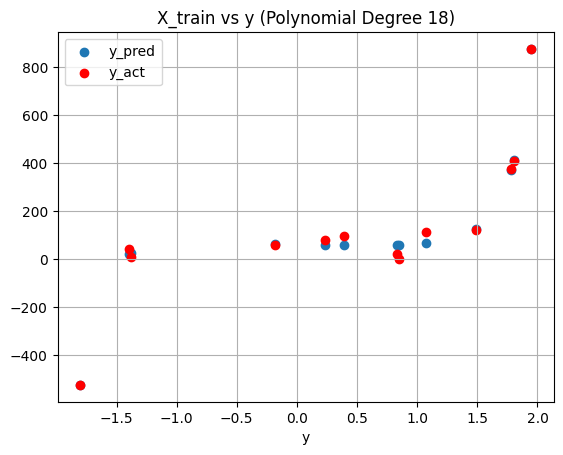

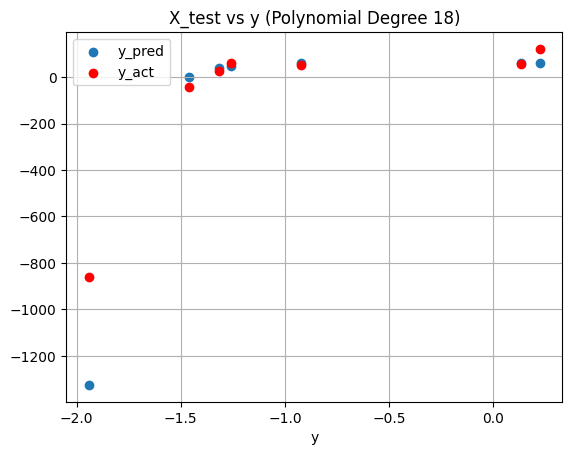

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.027e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree19) 27.476749190786464
RMSE (test)(degree19) 193.98719035459703


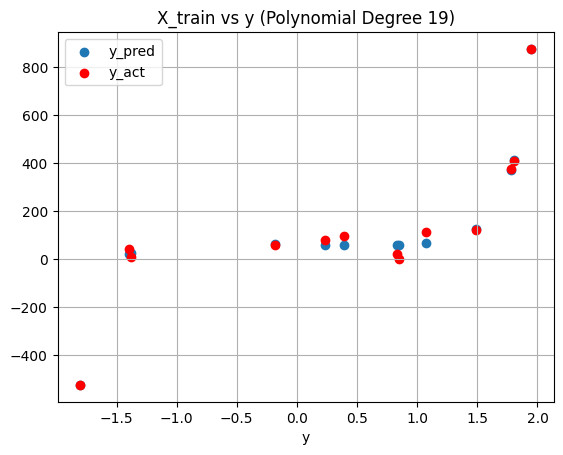

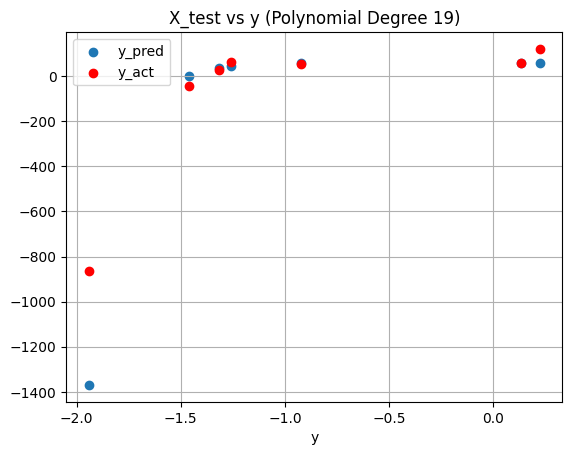

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.040e+03, tolerance: 1.183e+02
  model = cd_fast.enet_coordinate_descent(


RMSE (train)(degree20) 27.49764688369037
RMSE (test)(degree20) 195.7589201129029


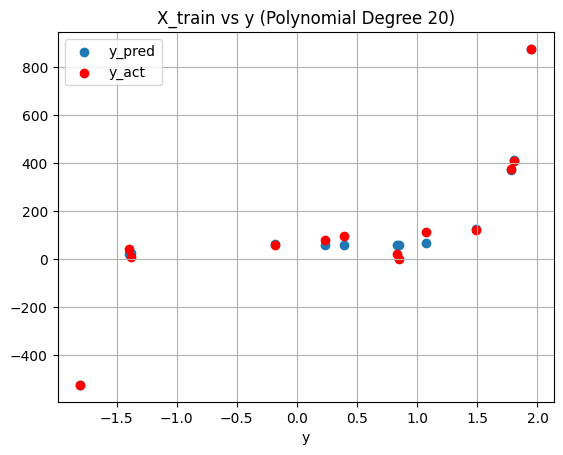

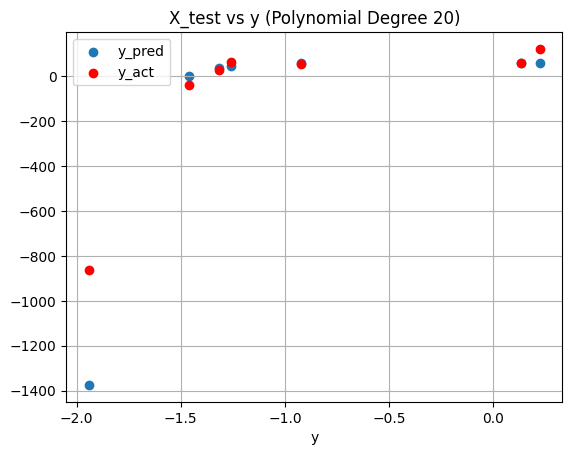

In [15]:
#polynomial regression with L1 regularization

max_degree=21
rmse_train=[]
rmse_test=[]
for i in range(max_degree):
# print(i)    
    poly = PolynomialFeatures(degree = i)
    X_poly_train=poly.fit_transform(X_train)


    
# instantiating the lasso regression model
    Model = Lasso()
 
# training the model
    Model.fit(X_poly_train, y_train)
 
# making predictions 
    y_pred = Model.predict(X_poly_train)
    X_poly_test=poly.fit_transform(X_test)
    y_test_pred=Model.predict(X_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))

    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')

    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

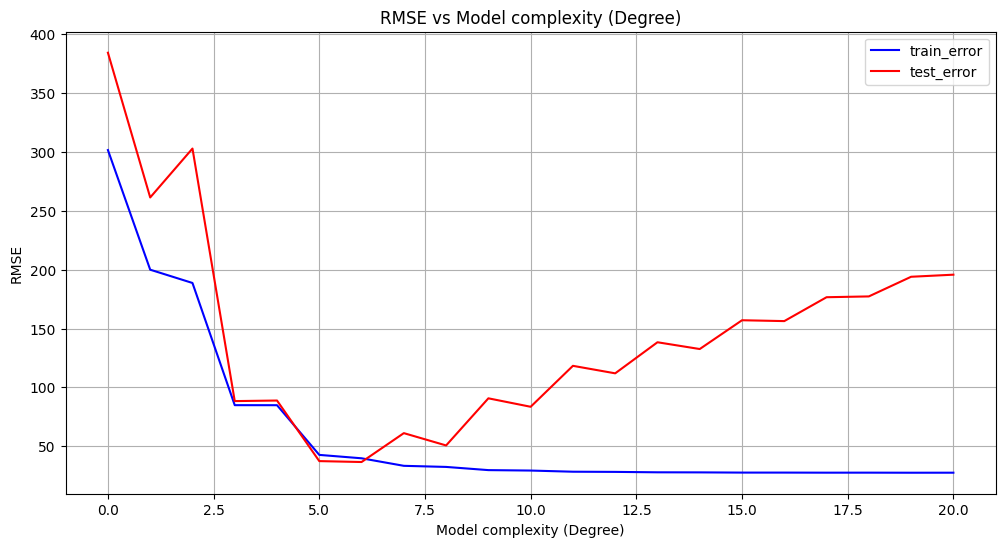

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label='train_error')
plt.plot(range(max_degree),rmse_test,c='r',label='test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.036e+03, tolerance: 2.941e+02
  model = cd_fast.enet_coordinate_descent(


rmse for test: 38.10645133837811


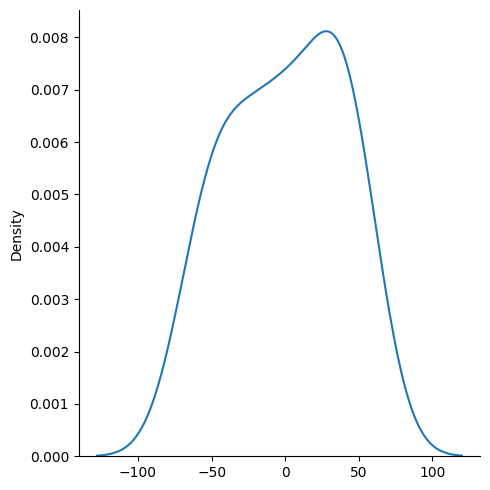

In [25]:
df_test = pd.read_csv('test (1).csv',header=None)
X_t=np.array(df_test[0]).reshape(-1,1)
y_t=np.array(df_test[1])
poly = PolynomialFeatures(degree = 10)
x_poly=poly.fit_transform(X_t)
Model = Lasso()
Model.fit(x_poly, y_t)
y_pred=Model.predict(x_poly)
test_noise=(y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test:', np.sqrt(mse(y_pred,y_t)))

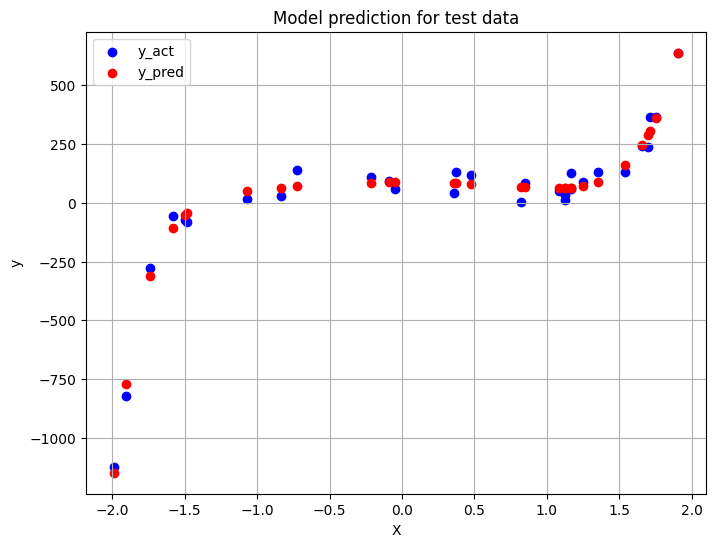

optimised weights: [  0.          -0.         -34.78366069   0.          -0.
  -0.05195412   6.1320049    2.3100224   -0.70822286   1.50861282
  -0.31323505]


In [26]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label='y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('optimised weights:', Model.coef_)

RMSE (train)(degree0) 301.65275552911066
RMSE (test)(degree0) 384.36621168239157


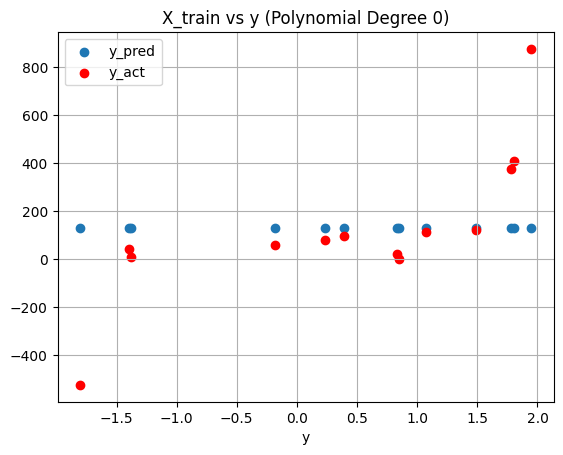

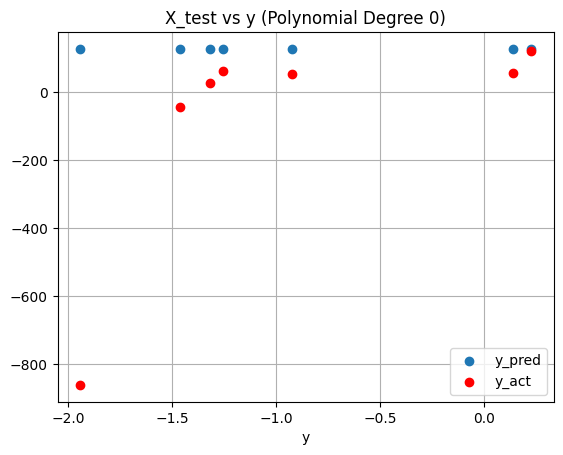

RMSE (train)(degree1) 200.28567348734305
RMSE (test)(degree1) 261.5439247839106


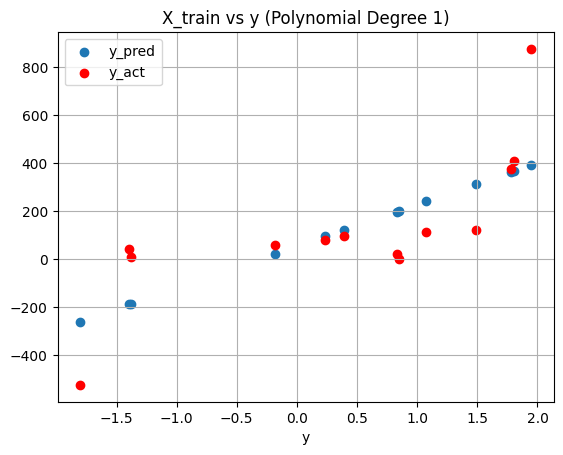

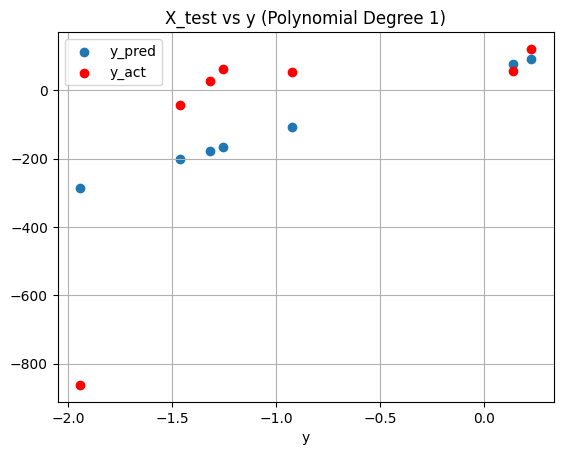

RMSE (train)(degree2) 188.99515162115145
RMSE (test)(degree2) 303.8846068756915


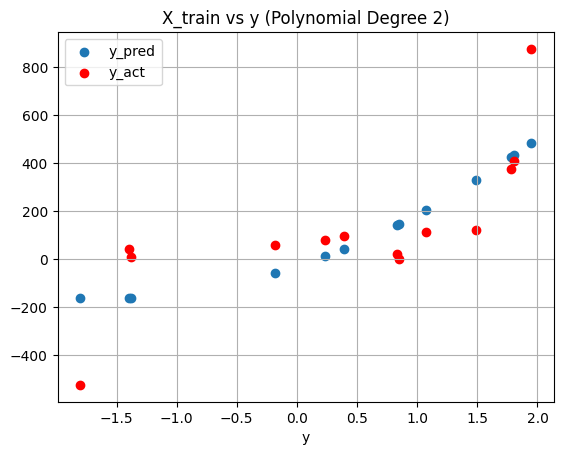

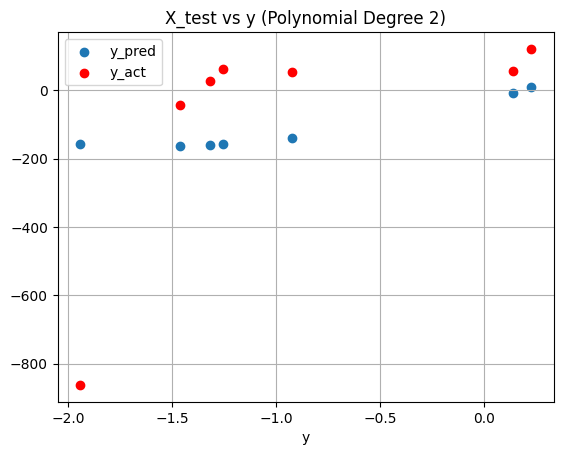

RMSE (train)(degree3) 94.56537087096481
RMSE (test)(degree3) 110.69131843397557


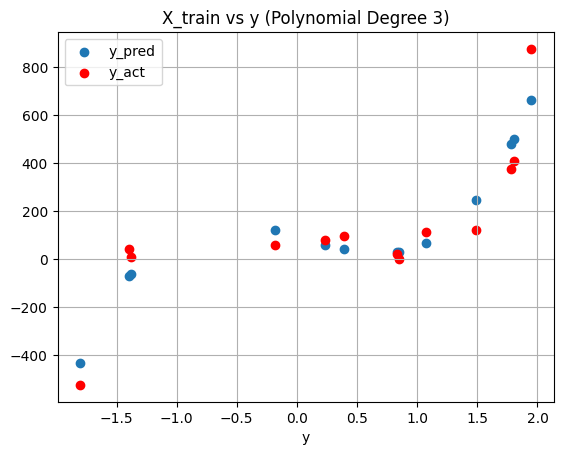

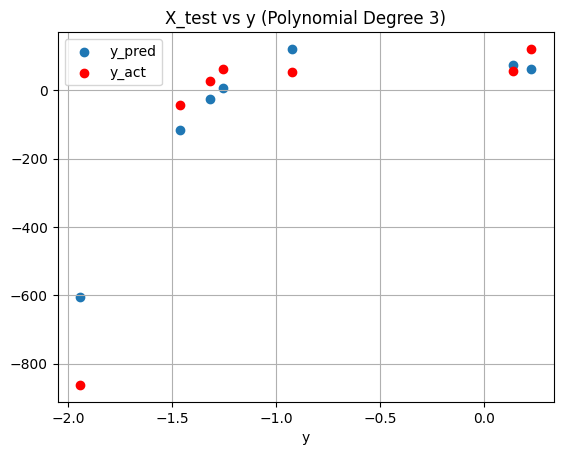

RMSE (train)(degree4) 94.45981308907807
RMSE (test)(degree4) 119.9670098614691


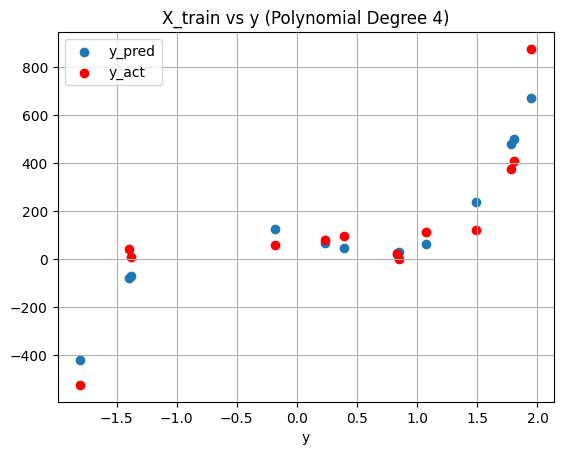

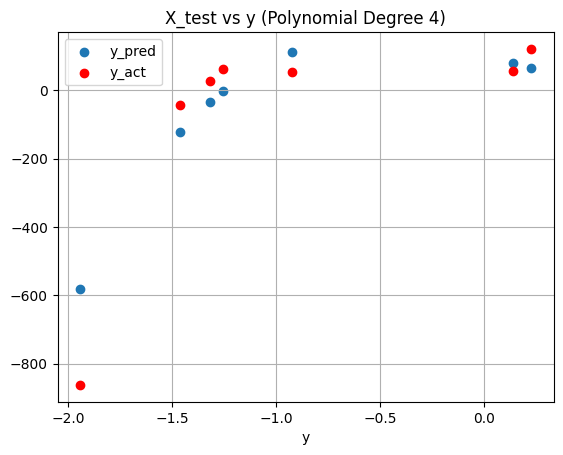

RMSE (train)(degree5) 47.28928840833828
RMSE (test)(degree5) 33.48693421710477


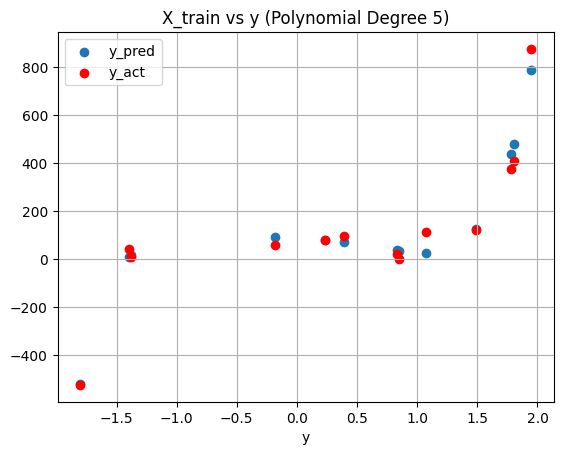

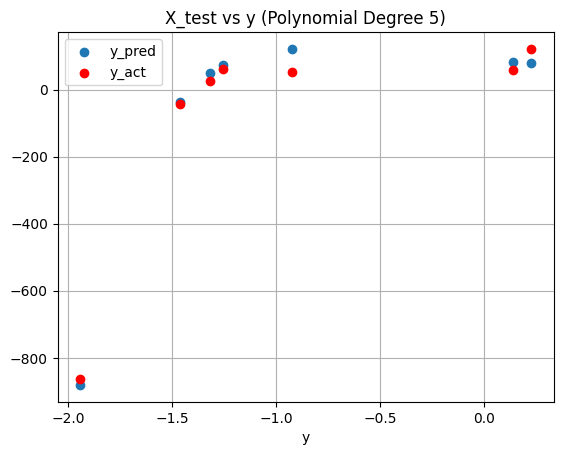

RMSE (train)(degree6) 44.3497074486519
RMSE (test)(degree6) 36.85169611736412


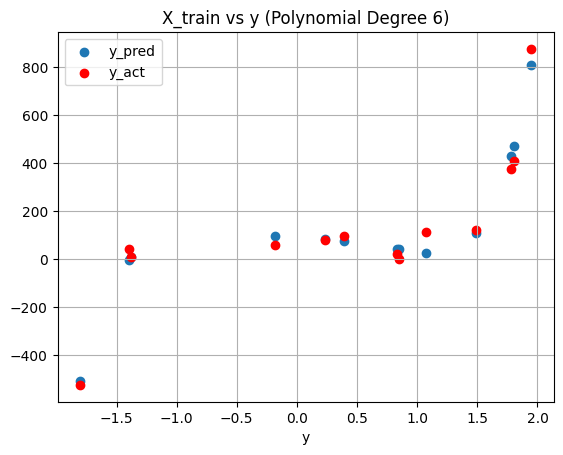

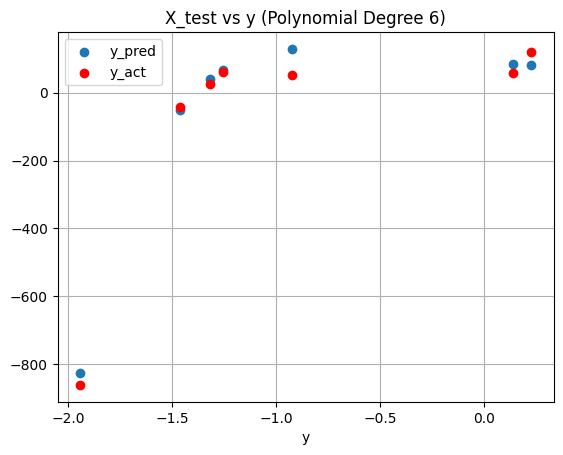

RMSE (train)(degree7) 32.64519832135097
RMSE (test)(degree7) 68.32805280179927


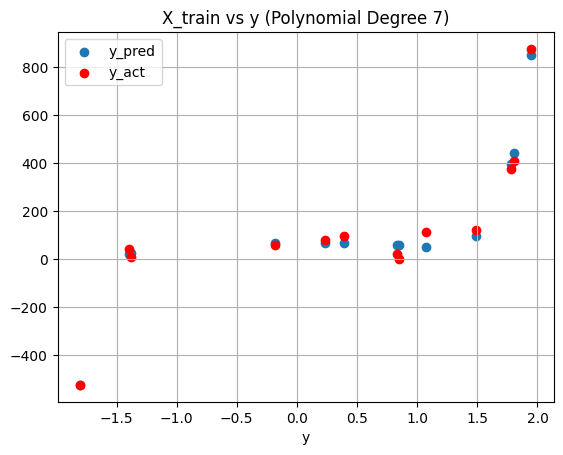

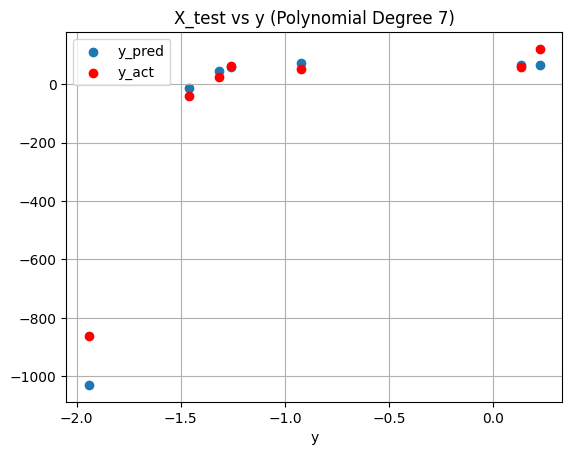

RMSE (train)(degree8) 31.061398886432933
RMSE (test)(degree8) 43.60963841848106


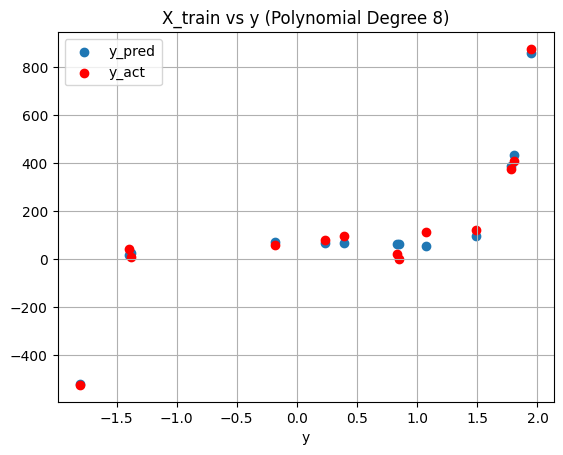

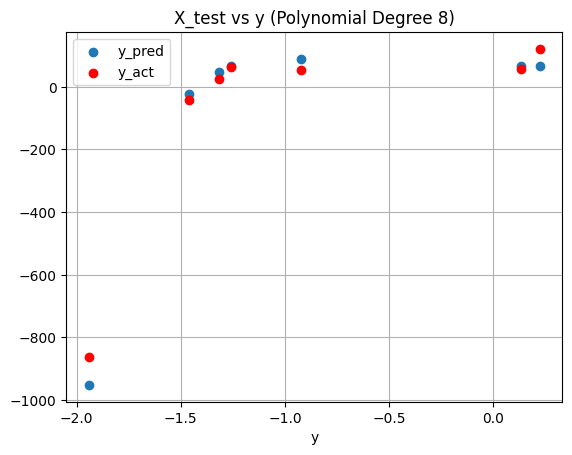

RMSE (train)(degree9) 27.9617441765722
RMSE (test)(degree9) 126.94140862950253


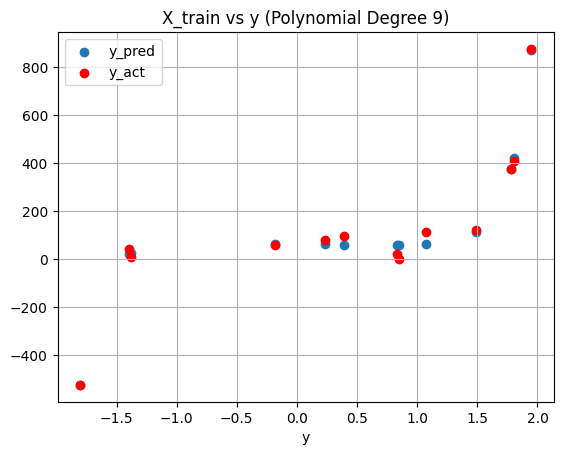

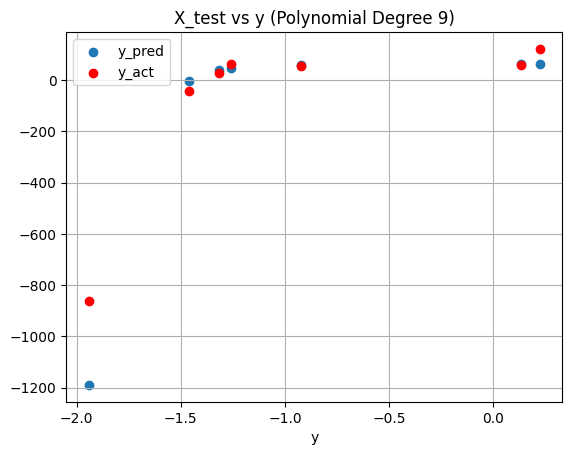

RMSE (train)(degree10) 27.2126947772327
RMSE (test)(degree10) 64.0917270371488


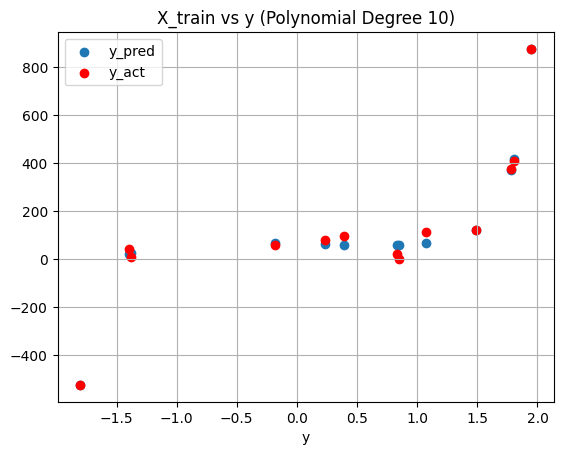

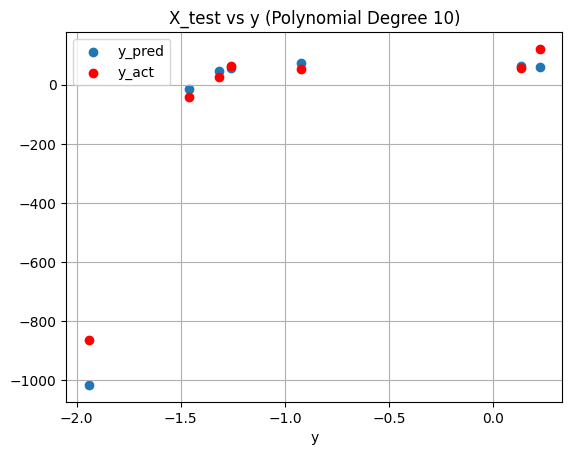

RMSE (train)(degree11) 26.68440476983288
RMSE (test)(degree11) 193.60349799292715


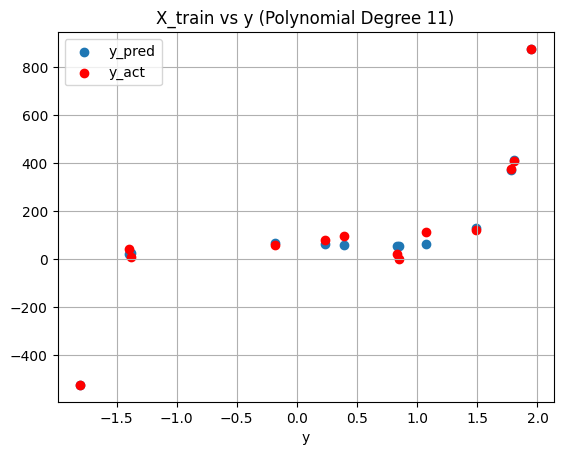

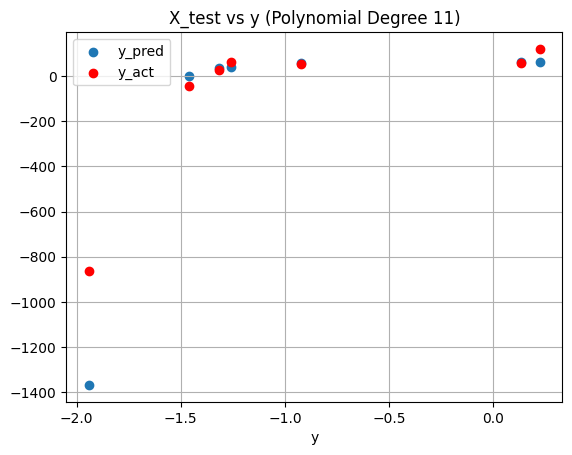

RMSE (train)(degree12) 26.732918148032446
RMSE (test)(degree12) 153.79940650049278


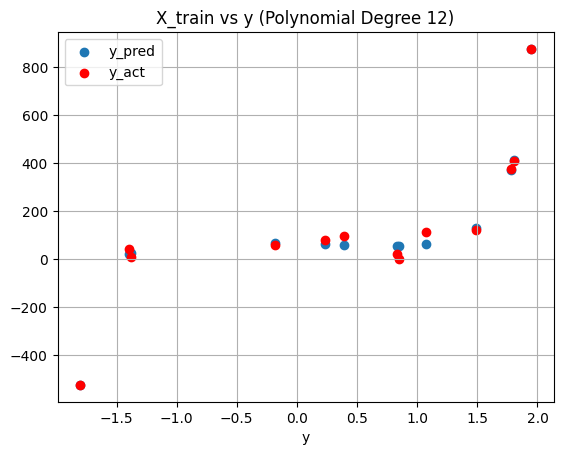

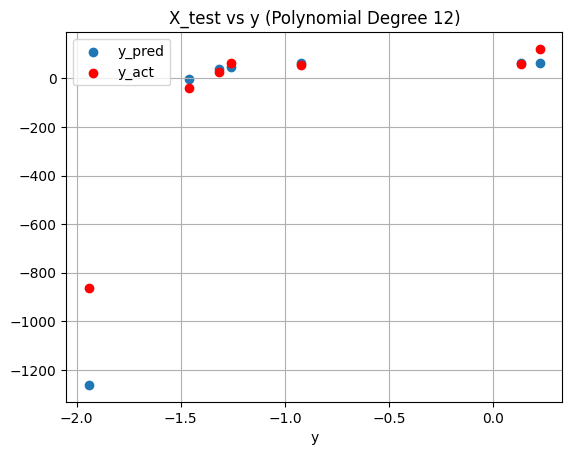

RMSE (train)(degree13) 26.764459948152485
RMSE (test)(degree13) 220.16286322255777


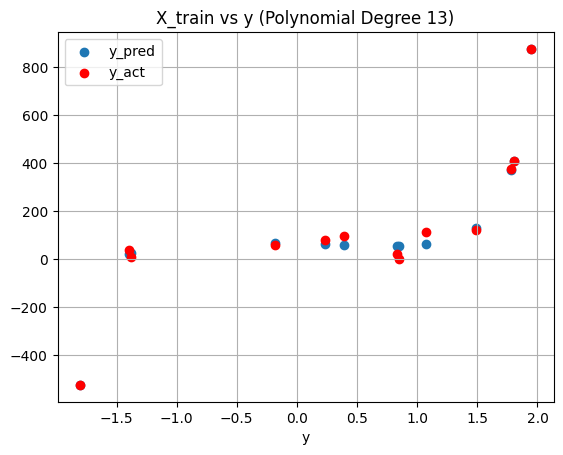

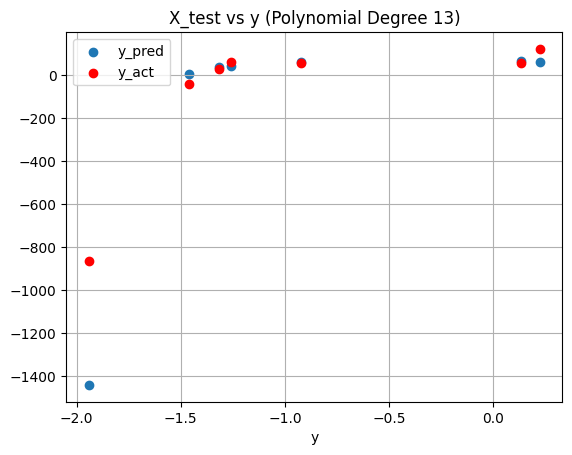

RMSE (train)(degree14) 26.128452809644116
RMSE (test)(degree14) 748.5997476077507


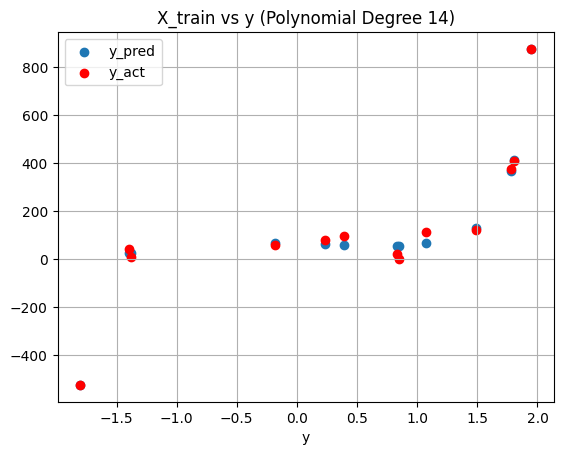

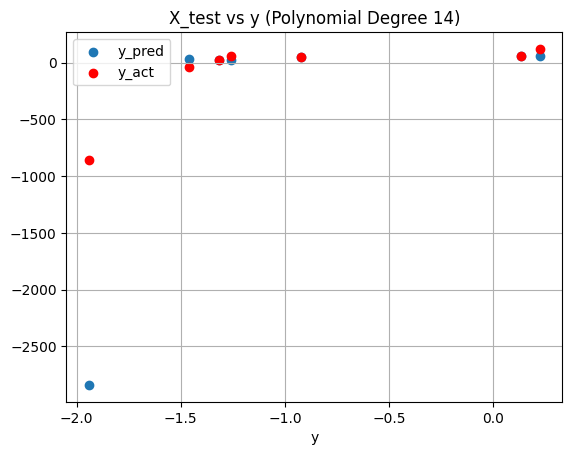

RMSE (train)(degree15) 26.030278061260503
RMSE (test)(degree15) 357.89038244915486


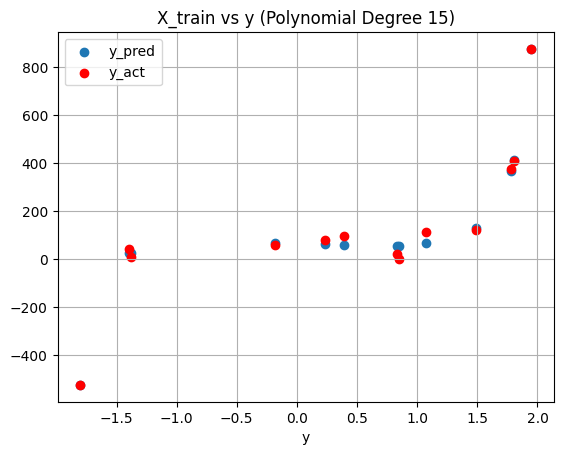

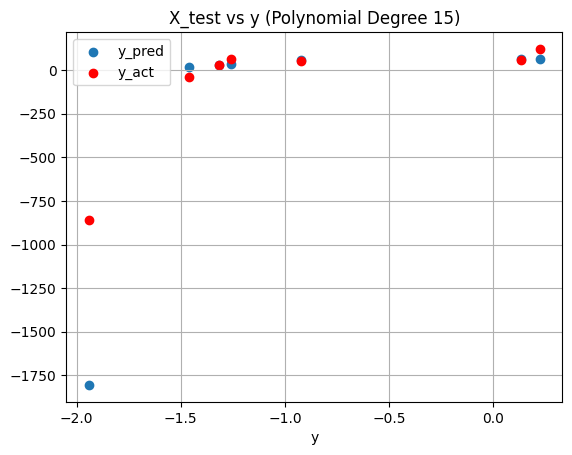

RMSE (train)(degree16) 24.9555756997559
RMSE (test)(degree16) 3113.2608576453513


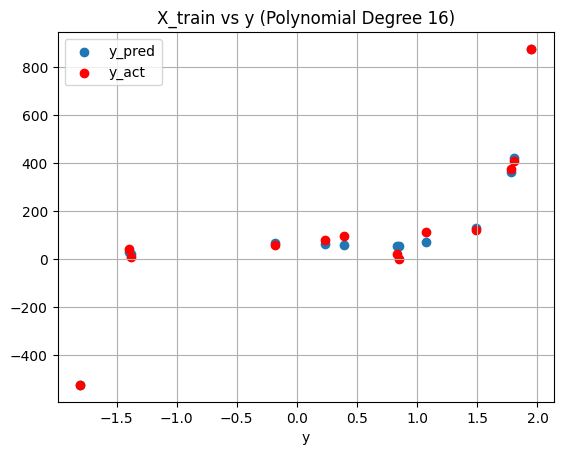

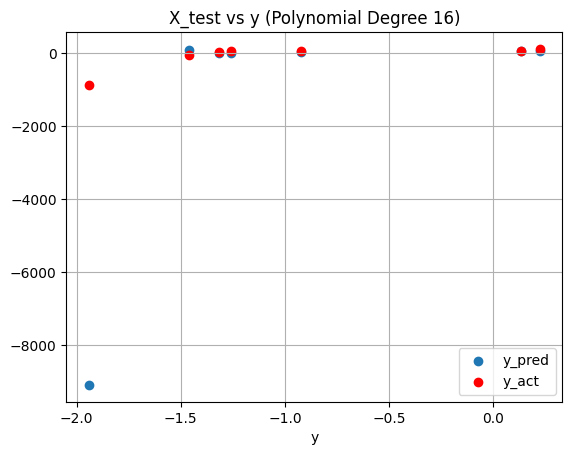

RMSE (train)(degree17) 24.94256311696764
RMSE (test)(degree17) 3316.8648201522215


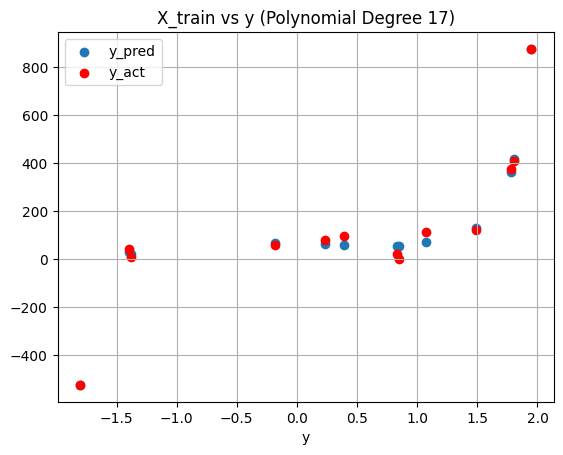

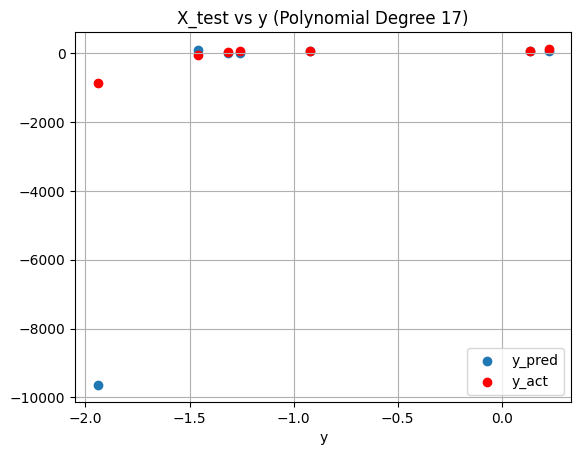

RMSE (train)(degree18) 25.01851897839995
RMSE (test)(degree18) 6371.72777066726


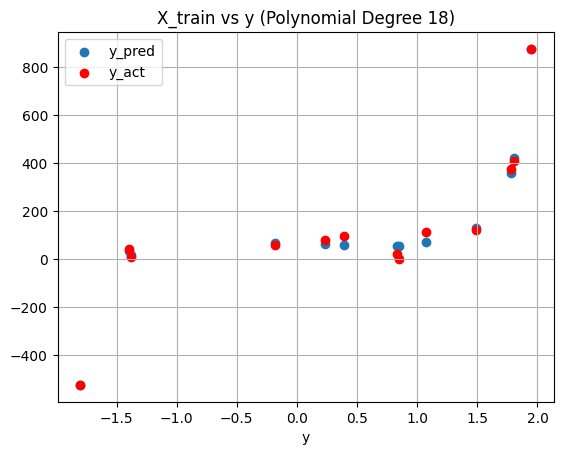

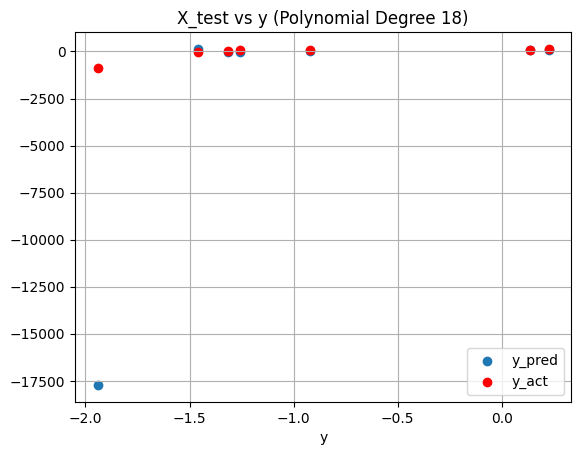

RMSE (train)(degree19) 23.853124025918426
RMSE (test)(degree19) 17525.776290577858


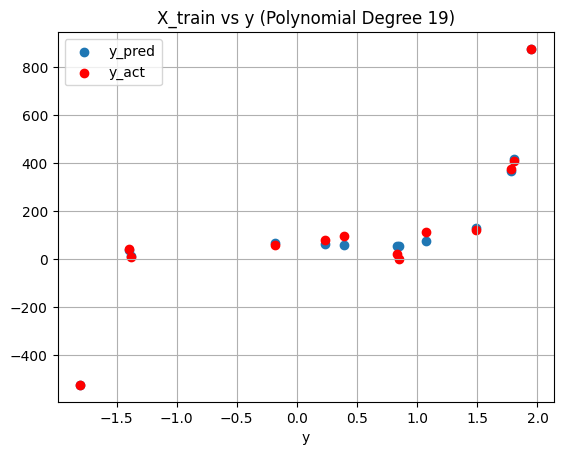

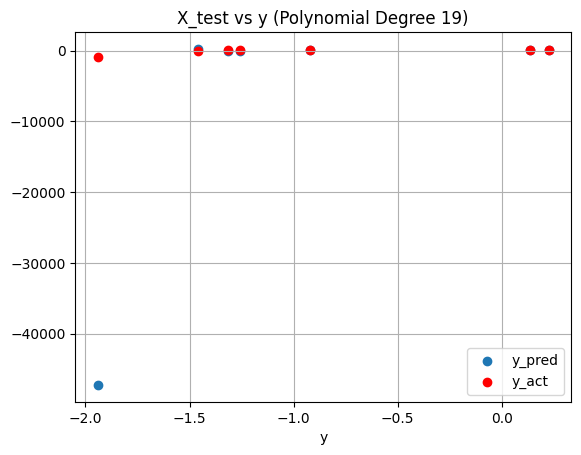

RMSE (train)(degree20) 23.445969654031096
RMSE (test)(degree20) 9690.475685267904


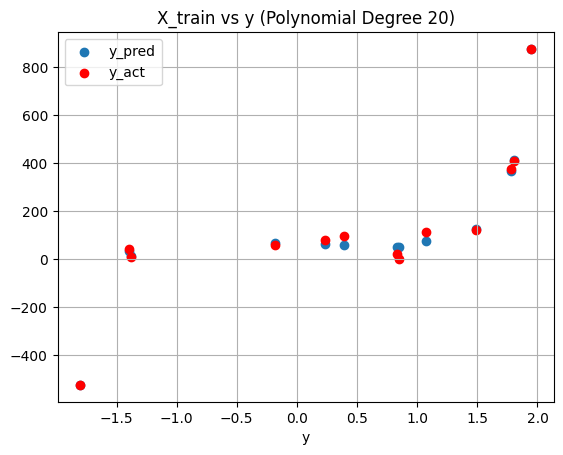

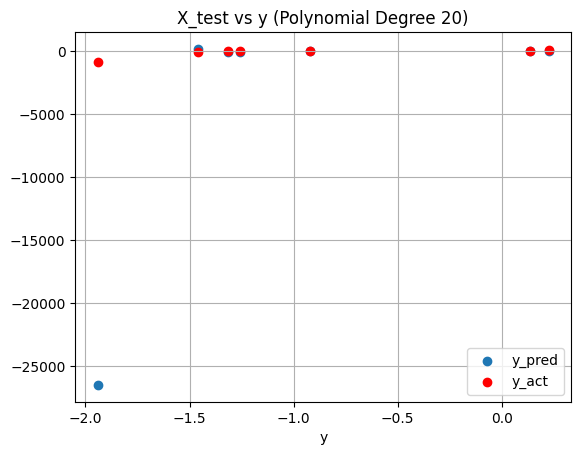

In [27]:
# POLYNOMIAL REGRESSION WITH L2 REGULARIZATION
max_degree=21
rmse_train=[]
rmse_test=[]
for i in range(max_degree):
# print(i)    
    poly = PolynomialFeatures(degree = i)
    X_poly_train=poly.fit_transform(X_train)


    
# instantiating the Ridge regression model
    model = Ridge()
 
# training the model
    model.fit(X_poly_train, y_train)
 
# making predictions 
    y_pred = model.predict(X_poly_train)
    X_poly_test=poly.fit_transform(X_test)
    y_test_pred=model.predict(X_poly_test)
    print(f'RMSE (train)(degree{i})',np.sqrt(mse(y_pred,y_train)))

    print(f'RMSE (test)(degree{i})',np.sqrt(mse(y_test_pred,y_test)))
    rmse_train.append(np.sqrt(mse(y_pred,y_train)))
    rmse_test.append(np.sqrt(mse(y_test_pred,y_test)))
    plt.scatter(X_train,y_pred,label='y_pred')

    plt.scatter(X_train,y_train,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_train vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()
    plt.scatter(X_test,y_test_pred,label='y_pred')
    plt.scatter(X_test,y_test,label="y_act",c='r')
    plt.xlabel("X")
    plt.xlabel("y")
    plt.title(f"X_test vs y (Polynomial Degree {i})")
    plt.grid(visible=True)
    plt.legend()
    plt.show()

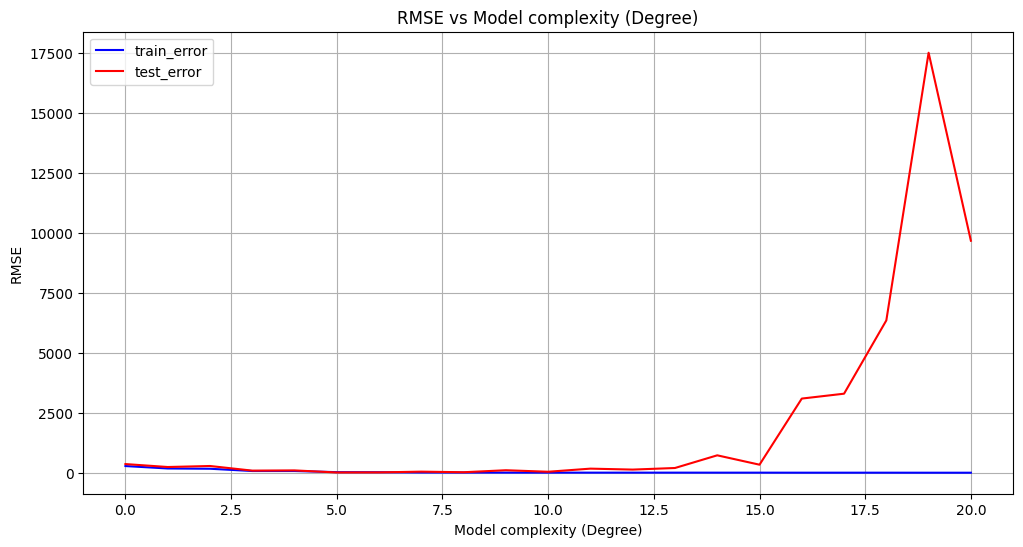

In [29]:

plt.figure(figsize=(12,6))
plt.plot(range(max_degree),rmse_train,c='b',label='train_error')
plt.plot(range(max_degree),rmse_test,c='r',label='test_error')
plt.title('RMSE vs Model complexity (Degree)')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

rmse for test: 32.99895426841613


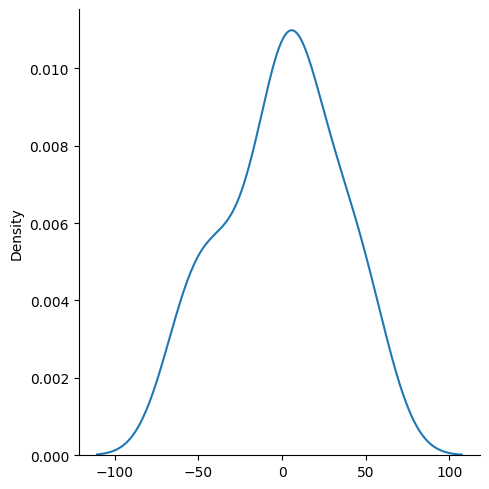

In [46]:
df_test = pd.read_csv('test (1).csv',header=None)
X_t=np.array(df_test[0]).reshape(-1,1)
y_t=np.array(df_test[1])
poly = PolynomialFeatures(degree = 15)
x_poly=poly.fit_transform(X_t)
model = Ridge(alpha=1)
model.fit(x_poly, y_t)
y_pred=model.predict(x_poly)
test_noise=(y_pred.reshape(-1)-y_t)
sns.displot(test_noise,kind='kde')
print('rmse for test:', np.sqrt(mse(y_pred,y_t)))


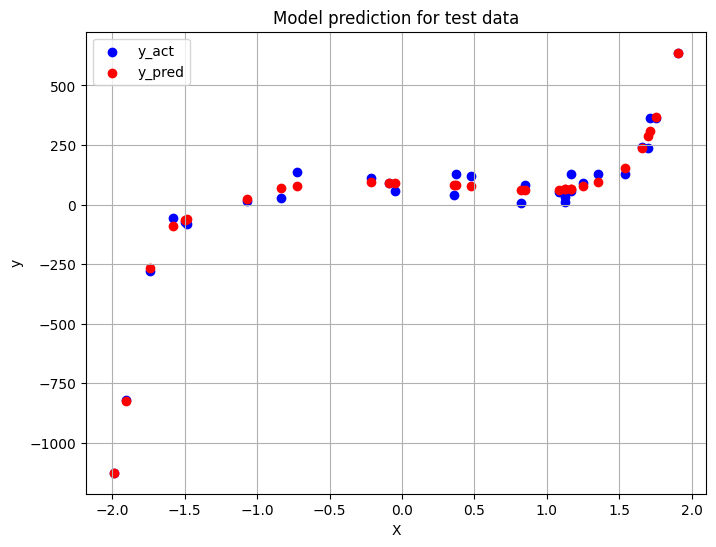

optimised weights: [  0.         -16.01122188 -22.26079152  -0.64331441 -20.44556081
  15.3129474   -7.51253978  19.59216723   4.47011521   4.15774271
   6.48295848 -18.94199357  -3.08770466   8.13259798   0.32830873
  -0.97833035]


In [47]:
plt.figure(figsize=(8,6))
plt.scatter(X_t,y_t,c='b',label='y_act')
plt.scatter(X_t,y_pred,c='r',label='y_pred')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model prediction for test data')
plt.grid()
plt.show()
print('optimised weights:', model.coef_)

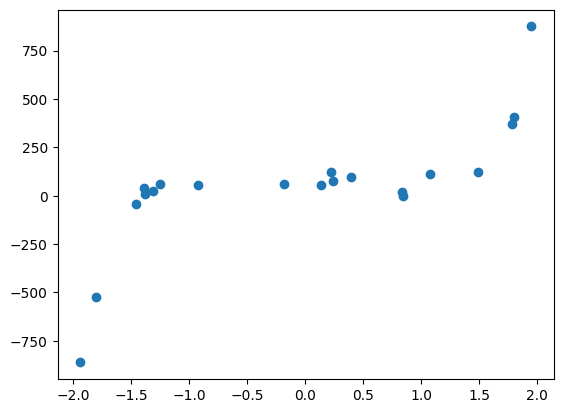

In [48]:
plt.scatter(X,y)
plt.show()


In [50]:
x_=data[0]
y_=data[1]

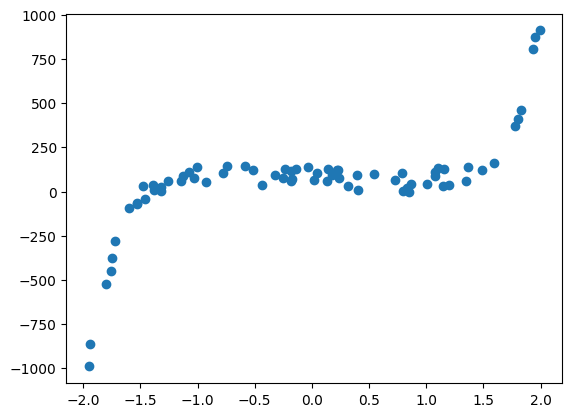

In [51]:
plt.scatter(x_,y_)
plt.show()

In [66]:
poly = PolynomialFeatures(degree=6, include_bias=False)

In [67]:
x = np.array(X)

In [68]:
poly

PolynomialFeatures(degree=6, include_bias=False)

In [70]:
poly_features = poly.fit_transform(X.reshape(-1, 1))